Pairwise Sequence Identity Matrix:
	O00175/1-119	O00585/1-134	O00626/1-93	O15444/1-150	O15467/1-120	P10147/1-92	P13236/1-92	P13500/1-99	P13501/1-91	P16619/1-93	P22362/1-96	P51671/1-97	P55773/1-120	P55774/1-89	P78556/1-96	P80075/1-99	P80098/1-99	Q16627/1-93	Q16663/1-113	Q8NHW4/1-92	Q92583/1-94	Q99616/1-98	Q99731/1-98	Q9NRJ3/1-127	Q9Y258/1-94	Q9Y4X3/1-112
O00175/1-119 100.00	23.93	27.27	20.87	22.61	33.33	28.09	28.12	21.35	32.22	29.79	31.58	22.68	32.18	20.21	32.29	31.25	25.84	30.77	29.21	25.00	32.63	26.04	21.93	33.70	13.89
O00585/1-134 23.93	100.00	26.14	24.43	23.89	25.84	28.41	32.63	22.73	28.09	22.58	32.63	21.88	29.55	24.47	32.63	31.58	22.73	27.78	28.41	23.08	29.79	32.99	16.94	24.18	16.82
O00626/1-93 27.27	26.14	100.00	18.60	21.98	26.97	27.78	24.44	25.84	24.44	23.60	27.27	18.48	27.91	19.32	24.44	28.89	23.08	25.00	27.78	26.97	28.89	25.88	20.00	28.09	19.10
O15444/1-150 20.87	24.43	18.60	100.00	22.52	22.99	23.26	24.73	27.91	19.54	25.27	25.81	20.21	24.14	23.91	24.73	24.73	18.60	22.73	23.26	2

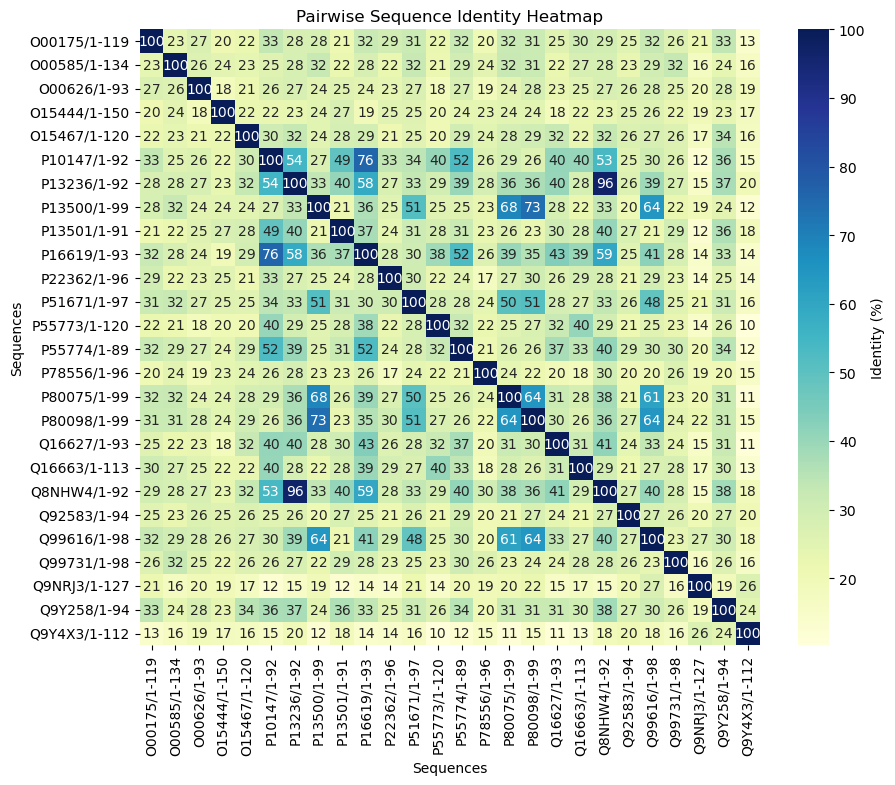

Total area under the density curve: 1.0000


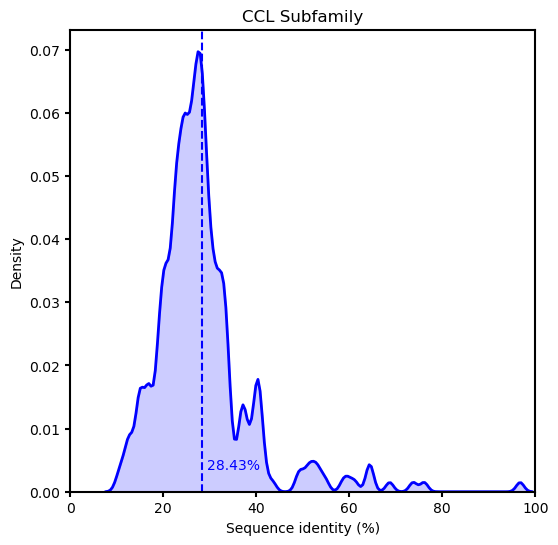

In [2]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_identity(seq1, seq2):
    """Calculates the percentage of identical positions between two sequences, ignoring gaps."""
    matches = 0
    valid_positions = 0
    
    for res1, res2 in zip(seq1, seq2):
        if res1 != "-" and res2 != "-":
            valid_positions += 1
            if res1 == res2:
                matches += 1
    
    identity = (matches / valid_positions) * 100 if valid_positions > 0 else 0
    return identity

def pairwise_sequence_identity(alignment_file):
    # Read alignment from the FASTA file
    alignment = AlignIO.read(alignment_file, "fasta")
    num_sequences = len(alignment)
    
    # Initialize an identity matrix
    identity_matrix = np.zeros((num_sequences, num_sequences))
    
    # Compute pairwise sequence identity
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = calculate_identity(alignment[i].seq, alignment[j].seq)
            identity_matrix[i, j] = identity
            identity_matrix[j, i] = identity  # Symmetric matrix
    
    return identity_matrix, [record.id for record in alignment]

def plot_heatmap(identity_matrix, sequence_ids):
    """Plots a heatmap of the identity matrix."""
    plt.figure(figsize=(10, 8))

    # Create a heatmap
    heatmap = sns.heatmap(identity_matrix, annot=True, cmap="YlGnBu", 
                           xticklabels=sequence_ids, yticklabels=sequence_ids,
                           cbar_kws={"label": "Identity (%)"},
                           fmt="g")  # Use fmt="g" for general format
    
    for text in heatmap.texts:
        text.set_text(int(float(text.get_text())))  # Convert to int for annotations

    plt.title("Pairwise Sequence Identity Heatmap")
    plt.xlabel("Sequences")
    plt.ylabel("Sequences")
    plt.show()

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_identity_distribution(identity_matrix, bw_adjust=0.25):
    """Plots the distribution of pairwise identities as a KDE with shaded area under the line, with reduced smoothing."""
    # Extract valid pairwise identities (excluding self-comparisons)
    valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
    
    # Calculate average and lowest identity
    average_identity = np.average(valid_identities)
    lowest_identity = np.min(valid_identities)

    plt.figure(figsize=(6, 6))
    
    # Plot the KDE density curve with reduced smoothing, clipped to start from the lowest identity
    kde_color = 'blue'
    kde = sns.kdeplot(valid_identities, color=kde_color, linewidth=2, bw_adjust=bw_adjust)
    
    # Get the data points of the kde line for shading under it
    kde_x, kde_y = kde.get_lines()[0].get_data()
    plt.fill_between(kde_x, kde_y, color=kde_color, alpha=0.2)

    # Calculate and print the total area under the KDE density curve
    total_area = np.trapz(kde_y, kde_x)
    print(f"Total area under the density curve: {total_area:.4f}")
    
    # Add dashed lines for average and lowest identity, both in the same color as the KDE line
    plt.axvline(average_identity, color=kde_color, linestyle='--', label=f'Average Identity: {average_identity:.2f}%')
    #plt.axvline(lowest_identity, color=kde_color, linestyle='--', label=f'Lowest Identity: {lowest_identity:.2f}%')

    # Annotate the average and lowest identity lines
    plt.text(average_identity + 1, max(kde_y) * 0.05, f'{average_identity:.2f}%', color=kde_color)
    #plt.text(lowest_identity + 1, max(kde_y) * 0.05, f'{lowest_identity:.2f}%', color=kde_color)

    plt.title("CCL Subfamily")
    plt.xlabel("Sequence identity (%)")
    plt.ylabel("Density")
    plt.xlim(0, 100)
    #plt.legend()
    plt.grid(False)
    
    # Make the box (axes) lines thicker
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.tick_params(width=1.5)  # Make tick marks thicker

    plt.show()




# Define input file path
alignment_file = "chemopar-db_CC_MSA.fa"

# Calculate pairwise identity matrix
identity_matrix, sequence_ids = pairwise_sequence_identity(alignment_file)

# Print matrix with sequence IDs
print("Pairwise Sequence Identity Matrix:")
print("\t" + "\t".join(sequence_ids))
for i, row in enumerate(identity_matrix):
    print(sequence_ids[i], "\t".join(f"{value:.2f}" for value in row))

# Calculate average and mean identities
valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
average_identity = np.average(valid_identities)

print(f"\nAverage Pairwise Identity (excluding self-comparisons): {average_identity:.2f}%")

# Plot the heatmap
plot_heatmap(identity_matrix, sequence_ids)

# Plot the distribution of identities
plot_identity_distribution(identity_matrix)


In [2]:
import urllib.request
import json

def get_protein_details():
    url = "https://chemopar-db.net/api/protein_details/"

    try:
        with urllib.request.urlopen(url) as response:
            data = json.loads(response.read().decode("utf-8"))
            # Assuming the response contains JSON data, you can use json.loads to access the data

            # Process or save the data as needed
            print("Protein details retrieved:", data)
    except urllib.error.HTTPError as e:
        print("Failed to retrieve protein details. Status code:", e.code)
    except urllib.error.URLError as e:
        print("Error connecting to the server:", e.reason)

# Example usage:
get_protein_details()

Protein details retrieved: [{'chemokine_ID': 1, 'name': '', 'gene_name': 'CXCL11L1_DANRE', 'subfamily': 'CXCL', 'type': 'CXCL11L1', 'species': 'Danio rerio', 'full_name': '', 'uniprot': 'A0A0R4INB9', 'iuphar': '', 'sequence': 'MKTVTALLLVSLAVVAIEGQHMKSQRCVCLGAGLNMVKPVLIEKIEILPSSPSCGHMEVIATLKNGAGKRCLNPKSKFTKKIIDKIEKNNRNAR'}, {'chemokine_ID': 2, 'name': '', 'gene_name': 'CXCL9_BOVIN', 'subfamily': 'CXCL', 'type': 'CXCL9', 'species': 'Bos taurus', 'full_name': '', 'uniprot': 'A9QWP9', 'iuphar': '', 'sequence': 'MKKSAPLFLGIIFLTLTGVQGVPAIRNGRCSCINTSQGMIHPKSLKDLKQFAPSPSCEKTEIIATMKNGNEACLNPDLPEVKELIKEWEKQVNQKKKQRKGKKYKKTKKVPKVKRSQRPSQKKTT'}, {'chemokine_ID': 3, 'name': '', 'gene_name': 'CXCL11_BOVIN', 'subfamily': 'CXCL', 'type': 'CXCL11', 'species': 'Bos taurus', 'full_name': '', 'uniprot': 'A9QWQ1', 'iuphar': '', 'sequence': 'MSVKGMAIVLTVILCAAIVQGFPMFKGGRCLCIGPGVKAVKVADIEKVSIIYPTNNCDKTEVIITLKTHKGQRCLNPKAKQAKAIIKKVQRKNSEKYKNI'}, {'chemokine_ID': 4, 'name': '', 'gene_name': 'CXCL11L6_DANRE', '

Pairwise Sequence Identity Matrix:
	O14625/1-94	O43927/1-109	O95715/1-111	P02775/1-128	P02776/1-101	P02778/1-98	P09341/1-107	P10145/1-99	P10720/1-104	P19875/1-107	P19876/1-107	P42830/1-114	P48061/1-93	P80162/1-114	Q07325/1-125
O14625/1-94 100.00	18.28	22.58	19.57	21.11	30.85	25.00	20.43	21.11	26.09	26.09	19.57	26.37	21.74	33.33
O43927/1-109 18.28	100.00	12.75	20.41	22.58	22.68	21.65	28.57	21.51	22.68	22.68	21.43	22.83	23.47	16.82
O95715/1-111 22.58	12.75	100.00	22.55	21.65	20.62	19.80	18.37	20.62	20.79	18.81	19.61	17.20	21.57	25.00
P02775/1-128 19.57	20.41	22.55	100.00	36.63	25.26	41.12	36.73	33.65	39.25	36.45	33.33	19.57	29.82	23.96
P02776/1-101 21.11	22.58	21.65	36.63	100.00	24.44	37.62	28.72	82.18	34.65	33.66	36.63	22.73	35.64	26.37
P02778/1-98 30.85	22.68	20.62	25.26	24.44	100.00	22.34	18.95	24.44	24.47	21.28	22.11	25.81	26.32	36.08
P09341/1-107 25.00	21.65	19.80	41.12	37.62	22.34	100.00	34.69	35.92	89.72	86.92	40.19	23.91	36.45	33.68
P10145/1-99 20.43	28.57	18.37	36.73	28.72	18.95

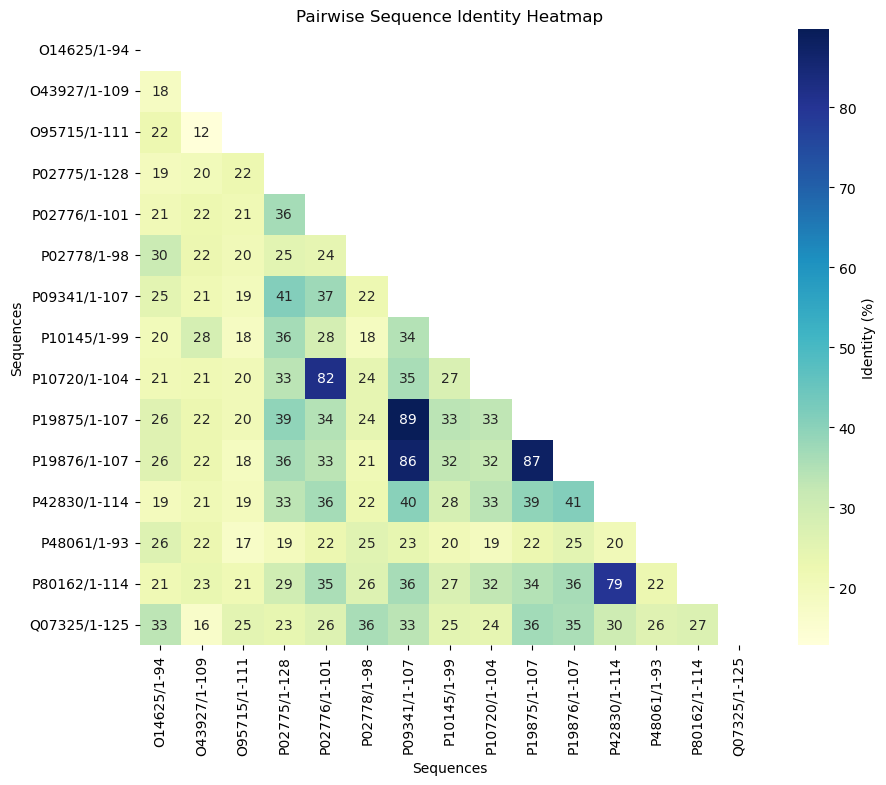

Total area under the density curve: 1.0000


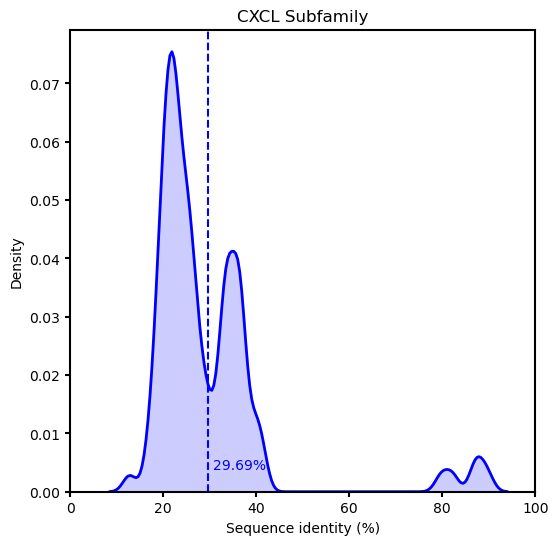

In [2]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_identity(seq1, seq2):
    """Calculates the percentage of identical positions between two sequences, ignoring gaps."""
    matches = 0
    valid_positions = 0
    
    for res1, res2 in zip(seq1, seq2):
        if res1 != "-" and res2 != "-":
            valid_positions += 1
            if res1 == res2:
                matches += 1
    
    identity = (matches / valid_positions) * 100 if valid_positions > 0 else 0
    return identity

def pairwise_sequence_identity(alignment_file):
    # Read alignment from the FASTA file
    alignment = AlignIO.read(alignment_file, "fasta")
    num_sequences = len(alignment)
    
    # Initialize an identity matrix
    identity_matrix = np.zeros((num_sequences, num_sequences))
    
    # Compute pairwise sequence identity
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = calculate_identity(alignment[i].seq, alignment[j].seq)
            identity_matrix[i, j] = identity
            identity_matrix[j, i] = identity  # Symmetric matrix
    
    return identity_matrix, [record.id for record in alignment]

def plot_heatmap(identity_matrix, sequence_ids):
    """Plots a heatmap of the identity matrix with the top-right triangle hidden."""
    plt.figure(figsize=(10, 8))
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(identity_matrix, dtype=bool))

    # Create a heatmap with the mask applied
    heatmap = sns.heatmap(identity_matrix, annot=True, cmap="YlGnBu", 
                          xticklabels=sequence_ids, yticklabels=sequence_ids,
                          cbar_kws={"label": "Identity (%)"},
                          fmt="g", mask=mask)  # Apply the mask

    for text in heatmap.texts:
        text.set_text(int(float(text.get_text())))  # Convert to int for annotations

    plt.title("Pairwise Sequence Identity Heatmap")
    plt.xlabel("Sequences")
    plt.ylabel("Sequences")
    plt.show()


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_identity_distribution(identity_matrix, bw_adjust=0.25):
    """Plots the distribution of pairwise identities as a KDE with shaded area under the line, with reduced smoothing."""
    # Extract valid pairwise identities (excluding self-comparisons)
    valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
    
    # Calculate average and lowest identity
    average_identity = np.average(valid_identities)
    lowest_identity = np.min(valid_identities)

    plt.figure(figsize=(6, 6))
    
    # Plot the KDE density curve with reduced smoothing, clipped to start from the lowest identity
    kde_color = 'blue'
    kde = sns.kdeplot(valid_identities, color=kde_color, linewidth=2, bw_adjust=bw_adjust)
    
    # Get the data points of the kde line for shading under it
    kde_x, kde_y = kde.get_lines()[0].get_data()
    plt.fill_between(kde_x, kde_y, color=kde_color, alpha=0.2)

    # Calculate and print the total area under the KDE density curve
    total_area = np.trapz(kde_y, kde_x)
    print(f"Total area under the density curve: {total_area:.4f}")
    
    # Add dashed lines for average and lowest identity, both in the same color as the KDE line
    plt.axvline(average_identity, color=kde_color, linestyle='--', label=f'Average Identity: {average_identity:.2f}%')
    #plt.axvline(lowest_identity, color=kde_color, linestyle='--', label=f'Lowest Identity: {lowest_identity:.2f}%')

    # Annotate the average and lowest identity lines
    plt.text(average_identity + 1, max(kde_y) * 0.05, f'{average_identity:.2f}%', color=kde_color)
    #plt.text(lowest_identity + 1, max(kde_y) * 0.05, f'{lowest_identity:.2f}%', color=kde_color)

    plt.title("CXCL Subfamily")
    plt.xlabel("Sequence identity (%)")
    plt.ylabel("Density")
    plt.xlim(0, 100)
    #plt.legend()
    plt.grid(False)
    
    # Make the box (axes) lines thicker
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.tick_params(width=1.5)  # Make tick marks thicker

    plt.show()




# Define input file path
alignment_file = "chemopar-db_CXC_MSA.fa"

# Calculate pairwise identity matrix
identity_matrix, sequence_ids = pairwise_sequence_identity(alignment_file)

# Print matrix with sequence IDs
print("Pairwise Sequence Identity Matrix:")
print("\t" + "\t".join(sequence_ids))
for i, row in enumerate(identity_matrix):
    print(sequence_ids[i], "\t".join(f"{value:.2f}" for value in row))

# Calculate average and mean identities
valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
average_identity = np.average(valid_identities)

print(f"\nAverage Pairwise Identity (excluding self-comparisons): {average_identity:.2f}%")

# Plot the heatmap
plot_heatmap(identity_matrix, sequence_ids)

# Plot the distribution of identities
plot_identity_distribution(identity_matrix)


Pairwise Sequence Identity Matrix:
	O14625/1-94	O43927/1-109	O95715/1-111	P02775/1-128	P02776/1-101	P02778/1-98	P09341/1-107	P10145/1-99	P10720/1-104	P19875/1-107	P19876/1-107	P42830/1-114	P48061/1-93	P80162/1-114	Q07325/1-125	O00175/1-119	O00585/1-134	O00626/1-93	O15444/1-150	O15467/1-120	P10147/1-92	P13236/1-92	P13500/1-99	P13501/1-91	P16619/1-93	P22362/1-96	P51671/1-97	P55773/1-120	P55774/1-89	P78556/1-96	P80075/1-99	P80098/1-99	Q16627/1-93	Q16663/1-113	Q8NHW4/1-92	Q92583/1-94	Q99616/1-98	Q99731/1-98	Q9NRJ3/1-127	Q9Y258/1-94	Q9Y4X3/1-112
O14625/1-94 100.00	18.28	22.58	19.57	21.11	30.85	25.00	20.43	21.11	26.09	26.09	19.57	26.37	21.74	33.33	17.78	9.89	9.30	21.11	13.48	15.73	12.50	15.38	21.59	13.48	14.44	17.58	17.78	21.35	19.57	16.48	17.58	14.77	14.44	12.50	10.00	18.89	16.48	18.89	14.44	14.29
O43927/1-109 18.28	100.00	12.75	20.41	22.58	22.68	21.65	28.57	21.51	22.68	22.68	21.43	22.83	23.47	16.82	21.70	19.05	17.98	18.45	20.95	25.00	21.98	16.33	17.58	22.83	23.96	26.80	16.16	21.35	23.96	18

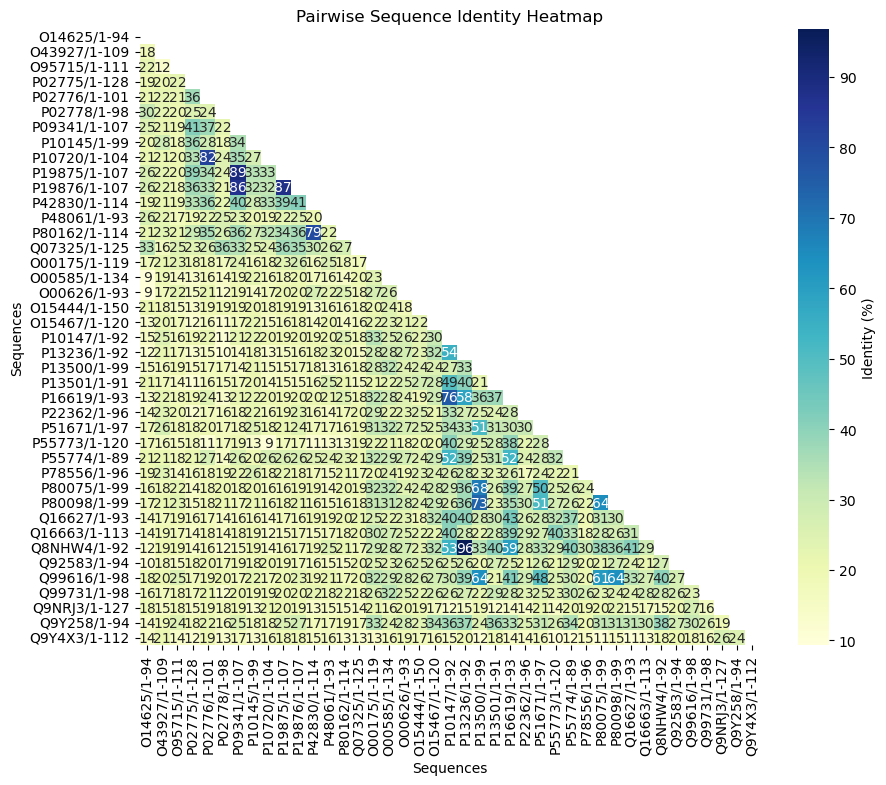

Total area under the density curve: 1.0000


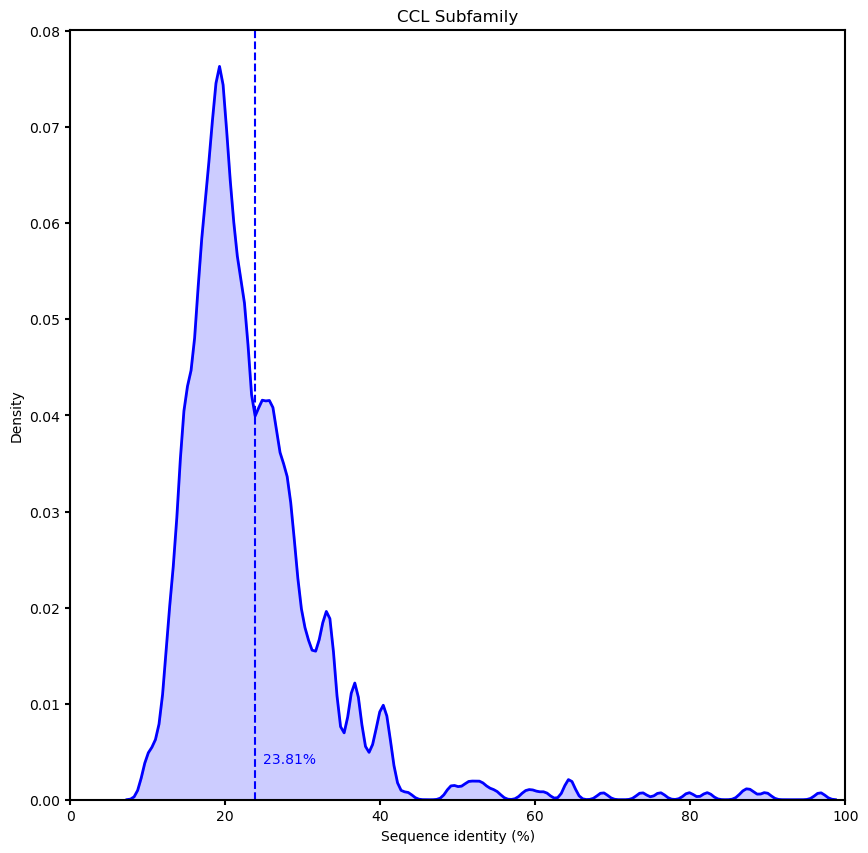


Sequence with the Highest Average Identity: P16619/1-93
Average Identity: 29.99%

Sequence with the Lowest Average Identity: Q9Y4X3/1-112
Average Identity: 16.32%


In [ ]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_identity(seq1, seq2):
    """Calculates the percentage of identical positions between two sequences, ignoring gaps."""
    matches = 0
    valid_positions = 0
    
    for res1, res2 in zip(seq1, seq2):
        if res1 != "-" and res2 != "-":
            valid_positions += 1
            if res1 == res2:
                matches += 1
    
    identity = (matches / valid_positions) * 100 if valid_positions > 0 else 0
    return identity

def pairwise_sequence_identity(alignment_file):
    # Read alignment from the FASTA file
    alignment = AlignIO.read(alignment_file, "fasta")
    num_sequences = len(alignment)
    
    # Initialize an identity matrix
    identity_matrix = np.zeros((num_sequences, num_sequences))
    
    # Compute pairwise sequence identity
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = calculate_identity(alignment[i].seq, alignment[j].seq)
            identity_matrix[i, j] = identity
            identity_matrix[j, i] = identity  # Symmetric matrix
    
    return identity_matrix, [record.id for record in alignment]

def plot_heatmap(identity_matrix, sequence_ids):
    """Plots a heatmap of the identity matrix with the top-right triangle hidden."""
    plt.figure(figsize=(10, 8))
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(identity_matrix, dtype=bool))

    # Create a heatmap with the mask applied
    heatmap = sns.heatmap(identity_matrix, annot=True, cmap="YlGnBu", 
                          xticklabels=sequence_ids, yticklabels=sequence_ids,
                          cbar_kws={"label": "Identity (%)"},
                          fmt="g", mask=mask)  # Apply the mask

    for text in heatmap.texts:
        text.set_text(int(float(text.get_text())))  # Convert to int for annotations

    plt.title("Pairwise Sequence Identity Heatmap")
    plt.xlabel("Sequences")
    plt.ylabel("Sequences")
    plt.show()



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_identity_distribution(identity_matrix, bw_adjust=0.25):
    """Plots the distribution of pairwise identities as a KDE with shaded area under the line, with reduced smoothing."""
    # Extract valid pairwise identities (excluding self-comparisons)
    valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
    
    # Calculate average and lowest identity
    average_identity = np.average(valid_identities)
    lowest_identity = np.min(valid_identities)

    plt.figure(figsize=(10, 10))
    
    # Plot the KDE density curve with reduced smoothing, clipped to start from the lowest identity
    kde_color = 'blue'
    kde = sns.kdeplot(valid_identities, color=kde_color, linewidth=2, bw_adjust=bw_adjust)
    
    # Get the data points of the kde line for shading under it
    kde_x, kde_y = kde.get_lines()[0].get_data()
    plt.fill_between(kde_x, kde_y, color=kde_color, alpha=0.2)

    # Calculate and print the total area under the KDE density curve
    total_area = np.trapz(kde_y, kde_x)
    print(f"Total area under the density curve: {total_area:.4f}")
    
    # Add dashed lines for average and lowest identity, both in the same color as the KDE line
    plt.axvline(average_identity, color=kde_color, linestyle='--', label=f'Average Identity: {average_identity:.2f}%')
    #plt.axvline(lowest_identity, color=kde_color, linestyle='--', label=f'Lowest Identity: {lowest_identity:.2f}%')

    # Annotate the average and lowest identity lines
    plt.text(average_identity + 1, max(kde_y) * 0.05, f'{average_identity:.2f}%', color=kde_color)
    #plt.text(lowest_identity + 1, max(kde_y) * 0.05, f'{lowest_identity:.2f}%', color=kde_color)

    plt.title("CCL Subfamily")
    plt.xlabel("Sequence identity (%)")
    plt.ylabel("Density")
    plt.xlim(0, 100)
    #plt.legend()
    plt.grid(False)
    
    # Make the box (axes) lines thicker
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.tick_params(width=1.5)  # Make tick marks thicker

    plt.show()



# Define input file path
alignment_file = "chemopar-db_human_MSA.fa"

# Calculate pairwise identity matrix
identity_matrix, sequence_ids = pairwise_sequence_identity(alignment_file)

# Print matrix with sequence IDs
print("Pairwise Sequence Identity Matrix:")
print("\t" + "\t".join(sequence_ids))
for i, row in enumerate(identity_matrix):
    print(sequence_ids[i], "\t".join(f"{value:.2f}" for value in row))

# Calculate average and mean identities
valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
average_identity = np.average(valid_identities)

print(f"\nAverage Pairwise Identity (excluding self-comparisons): {average_identity:.2f}%")

# Plot the heatmap
plot_heatmap(identity_matrix, sequence_ids)

# Plot the distribution of identities
plot_identity_distribution(identity_matrix)


# Calculate average sequence identity for each sequence (excluding self-comparisons)
average_identities = []
for i in range(len(identity_matrix)):
    # Exclude self-comparisons by averaging only non-diagonal elements
    non_diagonal_values = [identity_matrix[i][j] for j in range(len(identity_matrix)) if i != j]
    avg_identity = np.mean(non_diagonal_values)
    average_identities.append(avg_identity)

# Find the indices of the sequences with the highest and lowest average identities
highest_avg_index = np.argmax(average_identities)
lowest_avg_index = np.argmin(average_identities)

# Print the sequences with the highest and lowest average identities
print(f"\nSequence with the Highest Average Identity: {sequence_ids[highest_avg_index]}")
print(f"Average Identity: {average_identities[highest_avg_index]:.2f}%")

print(f"\nSequence with the Lowest Average Identity: {sequence_ids[lowest_avg_index]}")
print(f"Average Identity: {average_identities[lowest_avg_index]:.2f}%")


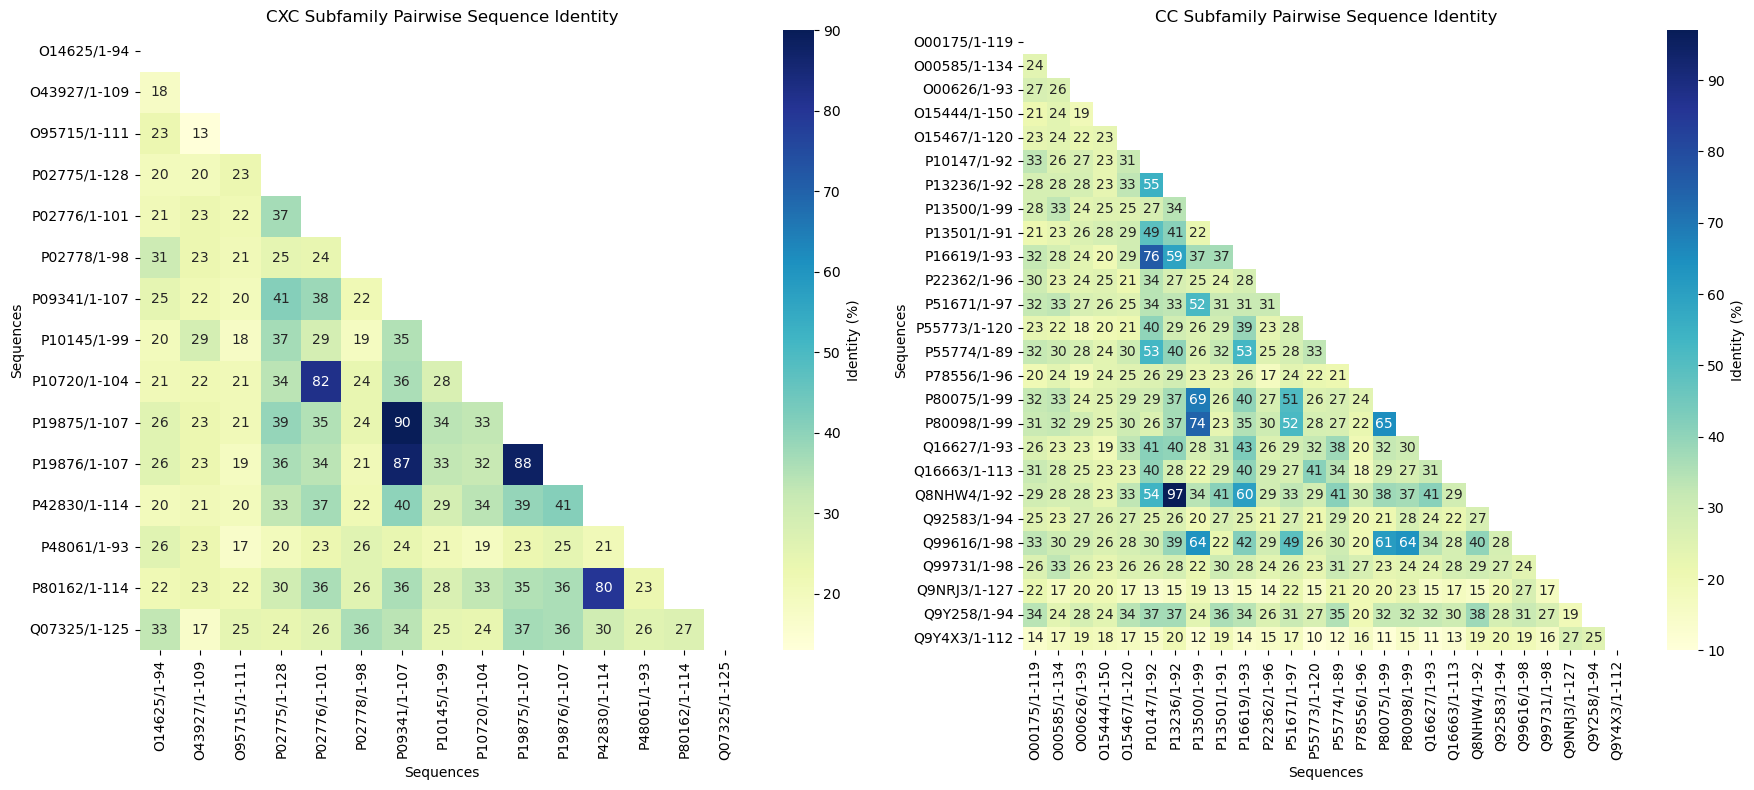

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import AlignIO

def calculate_identity(seq1, seq2):
    """Calculates the percentage of identical positions between two sequences, ignoring gaps."""
    matches = 0
    valid_positions = 0
    
    for res1, res2 in zip(seq1, seq2):
        if res1 != "-" and res2 != "-":
            valid_positions += 1
            if res1 == res2:
                matches += 1
    
    identity = (matches / valid_positions) * 100 if valid_positions > 0 else 0
    return identity

def pairwise_sequence_identity(alignment_file):
    # Read alignment from the FASTA file
    alignment = AlignIO.read(alignment_file, "fasta")
    num_sequences = len(alignment)
    
    # Initialize an identity matrix
    identity_matrix = np.zeros((num_sequences, num_sequences))
    
    # Compute pairwise sequence identity
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = calculate_identity(alignment[i].seq, alignment[j].seq)
            identity_matrix[i, j] = identity
            identity_matrix[j, i] = identity  # Symmetric matrix
    
    # Round the matrix to integer values
    identity_matrix = np.round(identity_matrix).astype(int)
    
    return identity_matrix, [record.id for record in alignment]

def plot_combined_heatmaps(cxc_identity_matrix, cc_identity_matrix, cxc_ids, cc_ids):
    """Plots a combined figure with heatmaps for CXC and CC subfamilies, with values rounded to whole numbers."""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot CXC heatmap with upper triangle masked and rounded values
    cxc_mask = np.triu(np.ones_like(cxc_identity_matrix, dtype=bool))
    sns.heatmap(cxc_identity_matrix, annot=True, cmap="YlGnBu", 
                xticklabels=cxc_ids, yticklabels=cxc_ids,
                cbar_kws={"label": "Identity (%)"}, fmt="d", mask=cxc_mask, ax=axes[0])
    axes[0].set_title("CXC Subfamily Pairwise Sequence Identity")
    axes[0].set_xlabel("Sequences")
    axes[0].set_ylabel("Sequences")

    # Plot CC heatmap with upper triangle masked and rounded values
    cc_mask = np.triu(np.ones_like(cc_identity_matrix, dtype=bool))
    sns.heatmap(cc_identity_matrix, annot=True, cmap="YlGnBu", 
                xticklabels=cc_ids, yticklabels=cc_ids,
                cbar_kws={"label": "Identity (%)"}, fmt="d", mask=cc_mask, ax=axes[1])
    axes[1].set_title("CC Subfamily Pairwise Sequence Identity")
    axes[1].set_xlabel("Sequences")
    axes[1].set_ylabel("Sequences")

    plt.tight_layout()
    plt.show()

# Define input file paths for CXC and CC subfamilies
cxc_alignment_file = "chemopar-db_CXC_MSA.fa"
cc_alignment_file = "chemopar-db_CC_MSA.fa"

# Calculate pairwise identity matrices
cxc_identity_matrix, cxc_ids = pairwise_sequence_identity(cxc_alignment_file)
cc_identity_matrix, cc_ids = pairwise_sequence_identity(cc_alignment_file)

# Plot both heatmaps in a single figure
plot_combined_heatmaps(cxc_identity_matrix, cc_identity_matrix, cxc_ids, cc_ids)


In [5]:
import requests

def assign_generic_numbers(pdb_file_path, output_file_path=None):
    """
    Assign generic residue numbers to a PDB structure using the GPCRdb API.
    
    Parameters:
        pdb_file_path (str): Path to the input PDB file.
        output_file_path (str, optional): Path to save the annotated PDB file. 
                                          If None, returns the annotated structure as a string.
                                          
    Returns:
        str: Annotated structure as a string if `output_file_path` is None.
        None: If `output_file_path` is specified, saves the output to the file.
    """
    # GPCRdb API endpoint
    url = "https://gpcrdb.org/services/structure/assign_generic_numbers"
    
    # Upload the file to the GPCRdb API
    with open(pdb_file_path, "rb") as file:
        response = requests.post(url, files={"pdb_file": file})

    # Check response status
    if response.status_code == 200:
        annotated_structure = response.text
        
        # If an output file path is specified, save the annotated structure
        if output_file_path:
            with open(output_file_path, "w") as f:
                f.write(annotated_structure)
            print(f"Annotated structure saved to {output_file_path}")
        else:
            # Return the annotated structure as a string
            return annotated_structure
    else:
        print(f"Failed to annotate {pdb_file_path}. Status code: {response.status_code}")
        print(response.text)


In [6]:
# Specify the path to your PDB file
pdb_file = "4RWS_gpcr_A.pdb"
output_file = "4RWS_gpcr_A_annotated.pdb"

# Run the function to annotate and save the structure
assign_generic_numbers(pdb_file, output_file)


Annotated structure saved to 4RWS_gpcr_A_annotated.pdb


In [7]:
import requests

def get_protein_residues(entry_name):
    """
    Fetches the list of residues for a given protein entry name from the GPCRdb API.
    
    Args:
    entry_name (str): The UniProt identifier of the protein (e.g., "cxcr4_human").
    
    Returns:
    dict: A dictionary with sequence numbers as keys and a dictionary of amino acid, 
          protein segment, and generic number as values.
    """
    url = f"https://gpcrdb.org/services/residues/{entry_name}/"
    headers = {
        "accept": "application/json",
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        residues = response.json()
        
        # Create a dictionary with sequence numbers as keys
        residue_dict = {
            residue["sequence_number"]: {
                "amino_acid": residue["amino_acid"],
                "protein_segment": residue["protein_segment"],
                "generic_number": residue["display_generic_number"]
            }
            for residue in residues
        }
        
        return residue_dict
    else:
        print(f"Error: Unable to fetch data. Status code {response.status_code}")
        return None

# Example usage
entry_name = "ackr3_human"  # Specify the protein identifier here
residues_dict = get_protein_residues(entry_name)

print(residues_dict)

{1: {'amino_acid': 'M', 'protein_segment': 'N-term', 'generic_number': None}, 2: {'amino_acid': 'D', 'protein_segment': 'N-term', 'generic_number': None}, 3: {'amino_acid': 'L', 'protein_segment': 'N-term', 'generic_number': None}, 4: {'amino_acid': 'H', 'protein_segment': 'N-term', 'generic_number': None}, 5: {'amino_acid': 'L', 'protein_segment': 'N-term', 'generic_number': None}, 6: {'amino_acid': 'F', 'protein_segment': 'N-term', 'generic_number': None}, 7: {'amino_acid': 'D', 'protein_segment': 'N-term', 'generic_number': None}, 8: {'amino_acid': 'Y', 'protein_segment': 'N-term', 'generic_number': None}, 9: {'amino_acid': 'S', 'protein_segment': 'N-term', 'generic_number': None}, 10: {'amino_acid': 'E', 'protein_segment': 'N-term', 'generic_number': None}, 11: {'amino_acid': 'P', 'protein_segment': 'N-term', 'generic_number': None}, 12: {'amino_acid': 'G', 'protein_segment': 'N-term', 'generic_number': None}, 13: {'amino_acid': 'N', 'protein_segment': 'N-term', 'generic_number': N

In [8]:
# Import necessary libraries
import pickle
import prolif
import pandas as pd
from IPython.display import display

# Define a dictionary mapping for structure-to-chain (adjust as needed)
structure_chain_map = {
    "7SK3": {"chemokine_chain": "B", "receptor_chain": "A"},
    # Add more structures as needed
}

# Load the pickled fingerprint object
try:
    fp = pd.read_pickle('7SK3_interactions.pkl')  # Adjust path if necessary
    interactions_dict = fp.ifp  # Ensure this attribute exists in your data
    
    # Prepare the data rows for the DataFrame
    rows = []
    for inner_dict in interactions_dict.values():  # Access each inner dictionary
        for (residue1, residue2), interactions in inner_dict.items():
            # Access properties of ResidueId directly (e.g., name, number, chain)
            for interaction_type, interaction_details in interactions.items():
                if residue2.chain == "A":  # Check chain attribute directly
                    rows.append({
                        "Residue A": f"{residue2.name} {residue2.number}",
                        "Residue B": f"{residue1.name} {residue1.number} {residue1.chain}",
                        "Interaction Type": interaction_type,
                    })

    # Convert the list of dictionaries to a DataFrame for display
    df = pd.DataFrame(rows)

    # Display the DataFrame
    display(df)  # Shows the first few rows for a quick view in the notebook
except FileNotFoundError:
    print("The specified pickle file was not found.")
except AttributeError:
    print("The loaded pickle file does not contain the expected structure with 'ifp' attribute.")


c:\Users\basde\miniconda3\envs\chemopardb\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Residue A,Residue B,Interaction Type
0,ASP 179,LYS 1 B,Hydrophobic
1,HIS 121,LYS 1 B,Hydrophobic
2,HIS 121,LYS 1 B,VdWContact
3,TRP 100,PRO 2 B,Hydrophobic
4,TRP 100,PRO 2 B,VdWContact
...,...,...,...
65,ILE 27,TYR 61 B,Hydrophobic
66,ILE 27,TYR 61 B,VdWContact
67,VAL 29,ALA 65 B,Hydrophobic
68,VAL 29,ALA 65 B,VdWContact


In [9]:
# Import necessary libraries
import pickle
import prolif
import pandas as pd
from IPython.display import display
import requests

# Define a dictionary mapping for structure-to-chain (adjust as needed)
structure_chain_map = {
    "7SK3": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    # Add more structures as needed
}

# Function to fetch GPCR residues with generic numbers
def get_protein_residues(entry_name):
    """
    Fetches the list of residues for a given protein entry name from the GPCRdb API.
    
    Args:
    entry_name (str): The UniProt identifier of the protein (e.g., "cxcr4_human").
    
    Returns:
    dict: A dictionary with sequence numbers as keys and generic numbers as values.
    """
    url = f"https://gpcrdb.org/services/residues/{entry_name}/"
    headers = {
        "accept": "application/json",
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        residues = response.json()
        
        # Create a dictionary with sequence numbers as keys
        residue_dict = {
            residue["sequence_number"]: residue["display_generic_number"]
            for residue in residues if residue["display_generic_number"] is not None
        }
        
        return residue_dict
    else:
        print(f"Error: Unable to fetch data. Status code {response.status_code}")
        return None

# Example usage: retrieve residues dictionary
entry_name = "ackr3_human"  # Specify the protein identifier here
residues_dict = get_protein_residues(entry_name)

# Load the pickled fingerprint object
try:
    fp = pd.read_pickle('7SK3_interactions.pkl')  # Adjust path if necessary
    interactions_dict = fp.ifp  # Ensure this attribute exists in your data
    
    # Prepare the data rows for the DataFrame
    rows = []
    for inner_dict in interactions_dict.values():  # Access each inner dictionary
        for (residue1, residue2), interactions in inner_dict.items():
            for interaction_type, interaction_details in interactions.items():
                if residue2.chain == "A":  # Check chain attribute directly
                    # Fetch the generic residue number from residues_dict
                    generic_number = residues_dict.get(residue2.number, "N/A")
                    
                    # Append the data row
                    rows.append({
                        "Residue A": f"{residue2.name} {residue2.number}",
                        "Residue B": f"{residue1.name} {residue1.number} {residue1.chain}",
                        "Interaction Type": interaction_type,
                        "Generic Residue Number": generic_number  # Add generic number column
                    })

    # Convert the list of dictionaries to a DataFrame for display
    df = pd.DataFrame(rows)

    # Display the DataFrame
    display(df)  # Shows the first few rows for a quick view in the notebook
except FileNotFoundError:
    print("The specified pickle file was not found.")
except AttributeError:
    print("The loaded pickle file does not contain the expected structure with 'ifp' attribute.")


,Residue A,Residue B,Interaction Type,Generic Residue Number
0,ASP 179,LYS 1 B,Hydrophobic,4.60x61
1,HIS 121,LYS 1 B,Hydrophobic,3.29x29
2,HIS 121,LYS 1 B,VdWContact,3.29x29
3,TRP 100,PRO 2 B,Hydrophobic,2.60x60
4,TRP 100,PRO 2 B,VdWContact,2.60x60
...,...,...,...,...
65,ILE 27,TYR 61 B,Hydrophobic,N/A
66,ILE 27,TYR 61 B,VdWContact,N/A
67,VAL 29,ALA 65 B,Hydrophobic,N/A
68,VAL 29,ALA 65 B,VdWContact,N/A


In [10]:
import os
import pickle
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch


# Define the directory containing pickle files and structure-chain mappings
pickle_directory = './test_folder2'  # Adjust path to your directory
structure_chain_map = {
    "7SK3": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    "7SK4": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    "7SK5": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    "7SK6": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    "7SK7": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    "7SK8": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    #"4RWS": {"chemokine_chain": "C", "receptor_chain": "A", "gene_name": "cxcr4_human"},
    #"4XT1": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "us28_hcmva"},
    #"4XT3": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "us28_hcmva"},
    #"5UIW": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ccr5_human"},
    #"5WB2": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "q80km9_hcmv"},
    #"6LFM": {"chemokine_chain": "D", "receptor_chain": "R", "gene_name": "cxcr2_human"},
    #"6LFO": {"chemokine_chain": "D", "receptor_chain": "R", "gene_name": "cxcr2_human"},
    #"6WWZ": {"chemokine_chain": "C", "receptor_chain": "R", "gene_name": "ccr6_human"},
    #"7F1Q": {"chemokine_chain": "C", "receptor_chain": "R", "gene_name": "ccr5_human"},
    #"7F1T": {"chemokine_chain": "C", "receptor_chain": "R", "gene_name": "ccr5_human"},
    #"7O7F": {"chemokine_chain": "I", "receptor_chain": "C", "gene_name": "ccr5_human"},
    #"7RKF": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "us28_hcmva"},
    #"7RKM": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "us28_hcmva"},
    #"7RKN": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "us28_hcmva"},
    #"7VL9": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "ccr1_human"},
    #"7VLA": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "ccr1_human"},
    #"7XA3": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "ccr2_human"},
    #"8HNK": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "cxcr3_human"},
    #"8IC0": {"chemokine_chain": "F", "receptor_chain": "A", "gene_name": "cxcr1_human"},
    #"8JPS": {"chemokine_chain": "D", "receptor_chain": "B", "gene_name": "ackr1_human"},
    #"8K2X": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "cxcr3_human"},
    "8K3Z": {"chemokine_chain": "D", "receptor_chain": "A", "gene_name": "cxcr4_human"},
    #"8K4O": {"chemokine_chain": "", "receptor_chain": "", "gene_name": ""},
    #"8U1U": {"chemokine_chain": "", "receptor_chain": "", "gene_name": ""},
    "8U4O": {"chemokine_chain": "J", "receptor_chain": "R", "gene_name": "cxcr4_human"},
    # Add more structures as needed
}



# Function to fetch GPCR residues with generic numbers from GPCRdb
def get_protein_residues(entry_name):
    url = f"https://gpcrdb.org/services/residues/{entry_name}/"
    headers = {"accept": "application/json"}
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        residues = response.json()
        return {
            residue["sequence_number"]: residue["display_generic_number"]
            for residue in residues if residue["display_generic_number"] is not None
        }
    else:
        print(f"Error fetching data for {entry_name}: Status code {response.status_code}")
        return None

# Loop through pickle files in the specified directory
combined_data = []
for filename in os.listdir(pickle_directory):
    if filename.endswith(".pkl"):
        filepath = os.path.join(pickle_directory, filename)
        
        # Extract structure name from filename
        structure_name = filename.split('_')[0]  # Assuming filename starts with structure name
        chain_info = structure_chain_map.get(structure_name)
        
        if chain_info:
            gene_name = chain_info["gene_name"]
            receptor_chain = chain_info["receptor_chain"]
            
            # Retrieve generic numbers for the current gene
            residues_dict = get_protein_residues(gene_name)
            
            try:
                # Load the pickle file and extract the fingerprint data
                fp = pd.read_pickle(filepath)
                interactions_dict = fp.ifp
                
                # Process each interaction to extract data rows
                rows = []
                for inner_dict in interactions_dict.values():
                    for (residue1, residue2), interactions in inner_dict.items():
                        for interaction_type, interaction_details in interactions.items():
                            if residue2.chain == receptor_chain:
                                # Map residue number to generic number
                                generic_number = residues_dict.get(residue2.number, "N/A")
                                
                                # Collect row with structure name, gene, and other details
                                rows.append({
                                    "Structure": structure_name,
                                    "Gene Name": gene_name,
                                    "Residue A": f"{residue2.name} {residue2.number}",
                                    "Residue B": f"{residue1.name} {residue1.number} {residue1.chain}",
                                    "Interaction Type": interaction_type,
                                    "Generic Residue Number": generic_number
                                })
                
                # Add the rows for this structure to the combined data list
                combined_data.extend(rows)
                
            except (FileNotFoundError, AttributeError):
                print(f"Error processing file: {filename}")

# Combine data from all structures into a single DataFrame
combined_df = pd.DataFrame(combined_data)

combined_df

# Specify the path and filename for the Excel file
excel_path = './combined_interactions2.xlsx'  # Adjust the path as needed

# Save the DataFrame as an Excel file
combined_df.to_excel(excel_path, index=False)

print(f"Data saved successfully to {excel_path}")


ModuleNotFoundError: No module named 'interaction'

C:\Users\basde\AppData\Local\Temp\ipykernel_24348\3749035172.py:146: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),


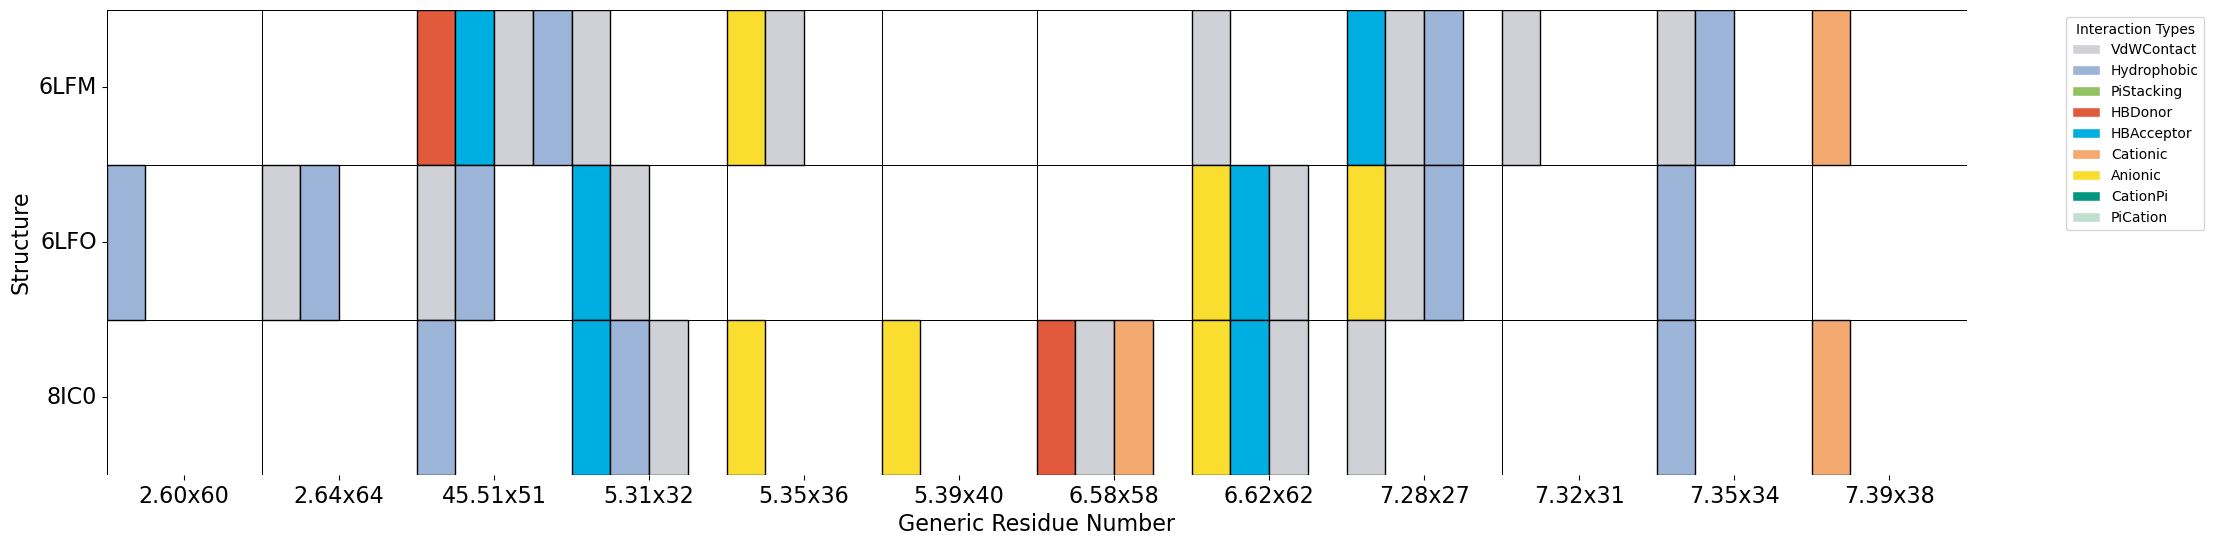

In [18]:
import os
import pickle
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch


# Define the directory containing pickle files and structure-chain mappings
pickle_directory = './test_folder'  # Adjust path to your directory
structure_chain_map = {
    #"7SK3": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    #"7SK4": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    #"7SK5": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    #"7SK6": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    #"7SK7": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    #"7SK8": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ackr3_human"},
    #"4RWS": {"chemokine_chain": "C", "receptor_chain": "A", "gene_name": "cxcr4_human"},
    #"4XT1": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "us28_hcmva"},
    #"4XT3": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "us28_hcmva"},
    #"5UIW": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "ccr5_human"},
    #"5WB2": {"chemokine_chain": "B", "receptor_chain": "A", "gene_name": "q80km9_hcmv"},
    "6LFM": {"chemokine_chain": "D", "receptor_chain": "R", "gene_name": "cxcr2_human"},
    "6LFO": {"chemokine_chain": "D", "receptor_chain": "R", "gene_name": "cxcr2_human"},
    #"6WWZ": {"chemokine_chain": "C", "receptor_chain": "R", "gene_name": "ccr6_human"},
    #"7F1Q": {"chemokine_chain": "C", "receptor_chain": "R", "gene_name": "ccr5_human"},
    #"7F1T": {"chemokine_chain": "C", "receptor_chain": "R", "gene_name": "ccr5_human"},
    #"7O7F": {"chemokine_chain": "I", "receptor_chain": "C", "gene_name": "ccr5_human"},
    #"7RKF": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "us28_hcmva"},
    #"7RKM": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "us28_hcmva"},
    #"7RKN": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "us28_hcmva"},
    #"7VL9": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "ccr1_human"},
    #"7VLA": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "ccr1_human"},
    #"7XA3": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "ccr2_human"},
    #"8HNK": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "cxcr3_human"},
    "8IC0": {"chemokine_chain": "F", "receptor_chain": "A", "gene_name": "cxcr1_human"},
    #"8JPS": {"chemokine_chain": "D", "receptor_chain": "B", "gene_name": "ackr1_human"},
    #"8K2X": {"chemokine_chain": "L", "receptor_chain": "R", "gene_name": "cxcr3_human"},
    #"8K3Z": {"chemokine_chain": "D", "receptor_chain": "A", "gene_name": "cxcr4_human"},
    #"8K4O": {"chemokine_chain": "", "receptor_chain": "", "gene_name": ""},
    #"8U1U": {"chemokine_chain": "", "receptor_chain": "", "gene_name": ""},
    #"8U4O": {"chemokine_chain": "J", "receptor_chain": "R", "gene_name": "cxcr4_human"},
    # Add more structures as needed
}



# Define color mapping for interaction types
interaction_color_map = {
        'VdWContact': '#CFD1D7',
        'Hydrophobic': '#9BB4D7',
        'PiStacking': '#92C261',
        'HBDonor': '#E15A3C',
        'HBAcceptor': '#00AFE2',
        'Cationic': '#F3A970',
        'Anionic': '#F9DE30',
        'CationPi': '#01977F',
        'PiCation': '#C0DFCF',
    }



# Function to fetch GPCR residues with generic numbers from GPCRdb
def get_protein_residues(entry_name):
    url = f"https://gpcrdb.org/services/residues/{entry_name}/"
    headers = {"accept": "application/json"}
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        residues = response.json()
        return {
            residue["sequence_number"]: residue["display_generic_number"]
            for residue in residues if residue["display_generic_number"] is not None
        }
    else:
        print(f"Error fetching data for {entry_name}: Status code {response.status_code}")
        return None

# Loop through pickle files in the specified directory
combined_data = []
for filename in os.listdir(pickle_directory):
    if filename.endswith(".pkl"):
        filepath = os.path.join(pickle_directory, filename)
        
        # Extract structure name from filename
        structure_name = filename.split('_')[0]  # Assuming filename starts with structure name
        chain_info = structure_chain_map.get(structure_name)
        
        if chain_info:
            gene_name = chain_info["gene_name"]
            receptor_chain = chain_info["receptor_chain"]
            
            # Retrieve generic numbers for the current gene
            residues_dict = get_protein_residues(gene_name)
            
            try:
                # Load the pickle file and extract the fingerprint data
                fp = pd.read_pickle(filepath)
                interactions_dict = fp.ifp
                
                # Process each interaction to extract data rows
                rows = []
                for inner_dict in interactions_dict.values():
                    for (residue1, residue2), interactions in inner_dict.items():
                        for interaction_type, interaction_details in interactions.items():
                            if residue2.chain == receptor_chain:
                                # Map residue number to generic number
                                generic_number = residues_dict.get(residue2.number, "N/A")
                                
                                # Collect row with structure name, gene, and other details
                                rows.append({
                                    "Structure": structure_name,
                                    "Gene Name": gene_name,
                                    "Residue A": f"{residue2.name} {residue2.number}",
                                    "Residue B": f"{residue1.name} {residue1.number} {residue1.chain}",
                                    "Interaction Type": interaction_type,
                                    "Generic Residue Number": generic_number
                                })
                
                # Add the rows for this structure to the combined data list
                combined_data.extend(rows)
                
            except (FileNotFoundError, AttributeError):
                print(f"Error processing file: {filename}")

# Combine data from all structures into a single DataFrame
combined_df = pd.DataFrame(combined_data)

# Explode the Interaction Type column where multiple interactions are present
combined_df = combined_df.assign(**{"Interaction Type": combined_df["Interaction Type"].str.split(", ")}).explode("Interaction Type")

# Filter out rows without generic numbers and set up the pivot table
combined_df = combined_df[combined_df["Generic Residue Number"] != "N/A"]
pivot_df = combined_df.pivot_table(
    index="Structure",
    columns="Generic Residue Number",
    values="Interaction Type",
    aggfunc=lambda x: ', '.join(set(x))  # Join unique interaction types if present multiple times
).fillna("")  # Replace NaN with an empty string

# Plotting
fig, ax = plt.subplots(figsize=(24, 20))
sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1), 
            cmap=["white"], cbar=False, square=True, ax=ax, linewidths=0.5, linecolor="black")

# Custom cell coloring based on user-defined color map
max_unique_interactions = max(
    len(set(i for i in interactions.split(', ') if i))
    for interactions in pivot_df.stack()
)

# Custom coloring with thicker borders for each interaction type
for y, row_label in enumerate(pivot_df.index):
    for x, col_label in enumerate(pivot_df.columns):
        interactions = pivot_df.iat[y, x].split(', ')
        unique_interactions = set([i for i in interactions if i])  # Get unique non-empty interactions

        for i, interaction in enumerate(unique_interactions):
            color = interaction_color_map.get(interaction, "grey")  # Use the defined color, or grey if not found
            width = 1 / max_unique_interactions
            # Draw the colored rectangle with a thicker border
            rect = Rectangle((x + i * width, y), width, 1, color=color, ec="black", lw=1)
            ax.add_patch(rect)

# Set tick labels for X and Y axes
ax.set_xticks([i + 0.5 for i in range(len(pivot_df.columns))])
ax.set_xticklabels(pivot_df.columns, rotation=0, ha="center", fontsize=16)
ax.set_yticks([i + 0.5 for i in range(len(pivot_df.index))])
ax.set_yticklabels(pivot_df.index, rotation=0, va="center", fontsize=16)
ax.set_xlabel("Generic Residue Number", fontsize=16)
ax.set_ylabel("Structure", fontsize=16)
#ax.set_title("Interaction Heatmap by Structure and Generic Residue Number")

# Create legend elements for interaction types
legend_elements = [
    Patch(facecolor=interaction_color_map.get(interaction, "grey"), edgecolor='w', label=interaction)
    for interaction in interaction_color_map.keys()
]

# Add the legend to the plot
plt.legend(handles=legend_elements, title="Interaction Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



C:\Users\basde\AppData\Local\Temp\ipykernel_27560\2933430028.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),


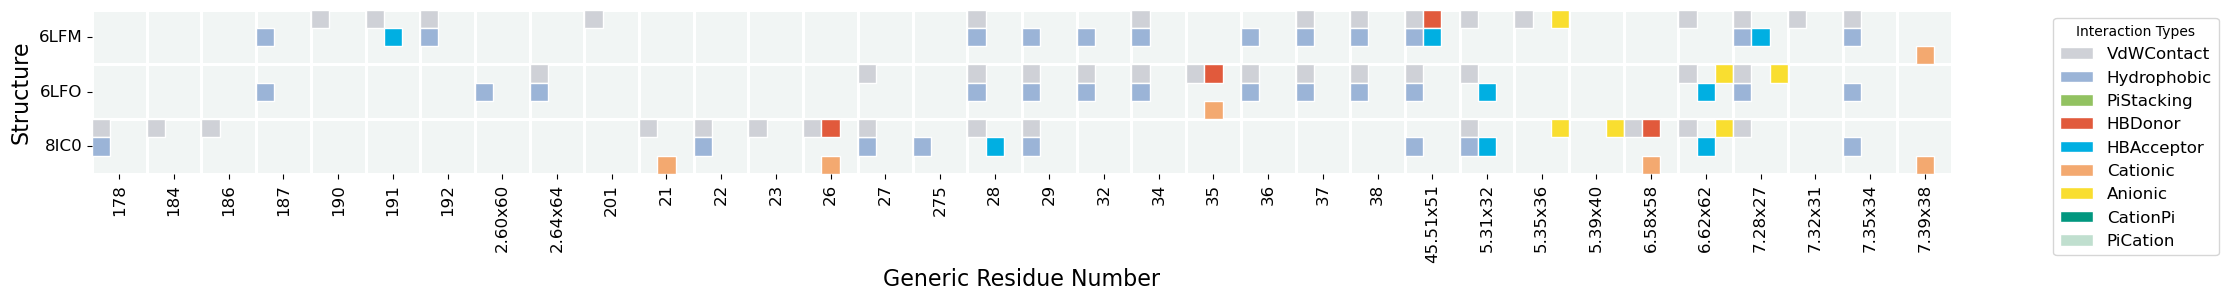

In [12]:
import os
import pickle
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch

def get_protein_residues(entry_name):
    """Fetch GPCR residues with generic numbers from GPCRdb."""
    url = f"https://gpcrdb.org/services/residues/{entry_name}/"
    response = requests.get(url, headers={"accept": "application/json"})
    
    if response.status_code == 200:
        return {
            residue["sequence_number"]: residue["display_generic_number"]
            for residue in response.json() if residue["display_generic_number"]
        }
    else:
        print(f"Error fetching data for {entry_name}: {response.status_code}")
        return {}

def load_pickle_data(pickle_directory, structure_chain_map):
    """Load and process interaction data from pickle files."""
    combined_data = []
    
    for filename in os.listdir(pickle_directory):
        if not filename.endswith(".pkl"):
            continue
        
        structure_name = filename.split('_')[0]
        chain_info = structure_chain_map.get(structure_name)
        
        if not chain_info:
            continue
        
        gene_name = chain_info["gene_name"]
        receptor_chain = chain_info["receptor_chain"]
        residues_dict = get_protein_residues(gene_name)
        
        try:
            fp = pd.read_pickle(os.path.join(pickle_directory, filename))
            interactions_dict = fp.ifp
            
            for inner_dict in interactions_dict.values():
                for (residue1, residue2), interactions in inner_dict.items():
                    if residue2.chain == receptor_chain:
                        generic_number = residues_dict.get(residue2.number, "N/A")
                        for interaction_type in interactions.keys():
                            combined_data.append({
                                "Structure": structure_name,
                                "Gene Name": gene_name,
                                "Residue A": f"{residue2.name} {residue2.number}",
                                "Residue B": f"{residue1.name} {residue1.number} {residue1.chain}",
                                "Interaction Type": interaction_type,
                                "Generic Residue Number": generic_number if generic_number != 'N/A' else str(residue2.number)
                            })
        except Exception as e:
            print(f"Error processing file {filename}: {e}")
    
    return pd.DataFrame(combined_data)

def create_heatmap(data):
    """Generate a heatmap of interaction types across structures using a 9 sub-cell system."""
    if data.empty:
        print("No data available to create heatmap.")
        return
    
    pivot_df = data.pivot_table(
        index="Structure",
        columns="Generic Residue Number",
        values="Interaction Type",
        aggfunc=lambda x: ', '.join(set(x))
    ).fillna("")
    
    interaction_color_map = {
        'VdWContact': '#CFD1D7', 'Hydrophobic': '#9BB4D7', 'PiStacking': '#92C261',
        'HBDonor': '#E15A3C', 'HBAcceptor': '#00AFE2', 'Cationic': '#F3A970',
        'Anionic': '#F9DE30', 'CationPi': '#01977F', 'PiCation': '#C0DFCF'
    }
    
    subcell_positions = [(i, j) for i in range(3) for j in range(3)]
    interaction_order = list(interaction_color_map.keys())
    
    fig, ax = plt.subplots(figsize=(24, 20))
    sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),
                cmap=["#F1F5F4"], cbar=False, square=True, ax=ax,
                linewidths=2, linecolor="white")
    
    for y, row_label in enumerate(pivot_df.index):
        for x, col_label in enumerate(pivot_df.columns):
            interactions = pivot_df.iat[y, x].split(', ')
            unique_interactions = [i for i in interactions if i]
            
            for interaction in unique_interactions:
                if interaction in interaction_order:
                    idx = interaction_order.index(interaction)
                    subcell_x, subcell_y = subcell_positions[idx]
                    color = interaction_color_map.get(interaction, "grey")
                    rect = Rectangle((x + subcell_x * (1/3), y + subcell_y * (1/3)), 1/3, 1/3, color=color, ec="white", lw=1)
                    ax.add_patch(rect)
    
    ax.set_xticks([i + 0.5 for i in range(len(pivot_df.columns))])
    ax.set_xticklabels(pivot_df.columns, rotation=90, ha="center", fontsize=12)
    ax.set_yticks([i + 0.5 for i in range(len(pivot_df.index))])
    ax.set_yticklabels(pivot_df.index, rotation=0, va="center", fontsize=12)
    ax.set_xlabel("Generic Residue Number", fontsize=16)
    ax.set_ylabel("Structure", fontsize=16)
    
    legend_elements = [
        Patch(facecolor=interaction_color_map.get(interaction, "grey"), edgecolor='w', label=interaction)
        for interaction in interaction_color_map.keys()
    ]
    plt.legend(handles=legend_elements, title="Interaction Types", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.show()

# Example usage
pickle_directory = "./test_folder"
structure_chain_map = {
    "6LFM": {"chemokine_chain": "D", "receptor_chain": "R", "gene_name": "cxcr2_human"},
    "6LFO": {"chemokine_chain": "D", "receptor_chain": "R", "gene_name": "cxcr2_human"},
    "8IC0": {"chemokine_chain": "F", "receptor_chain": "A", "gene_name": "cxcr1_human"}
}

data = load_pickle_data(pickle_directory, structure_chain_map)
create_heatmap(data)


C:\Users\basde\AppData\Local\Temp\ipykernel_27560\4161854278.py:88: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),


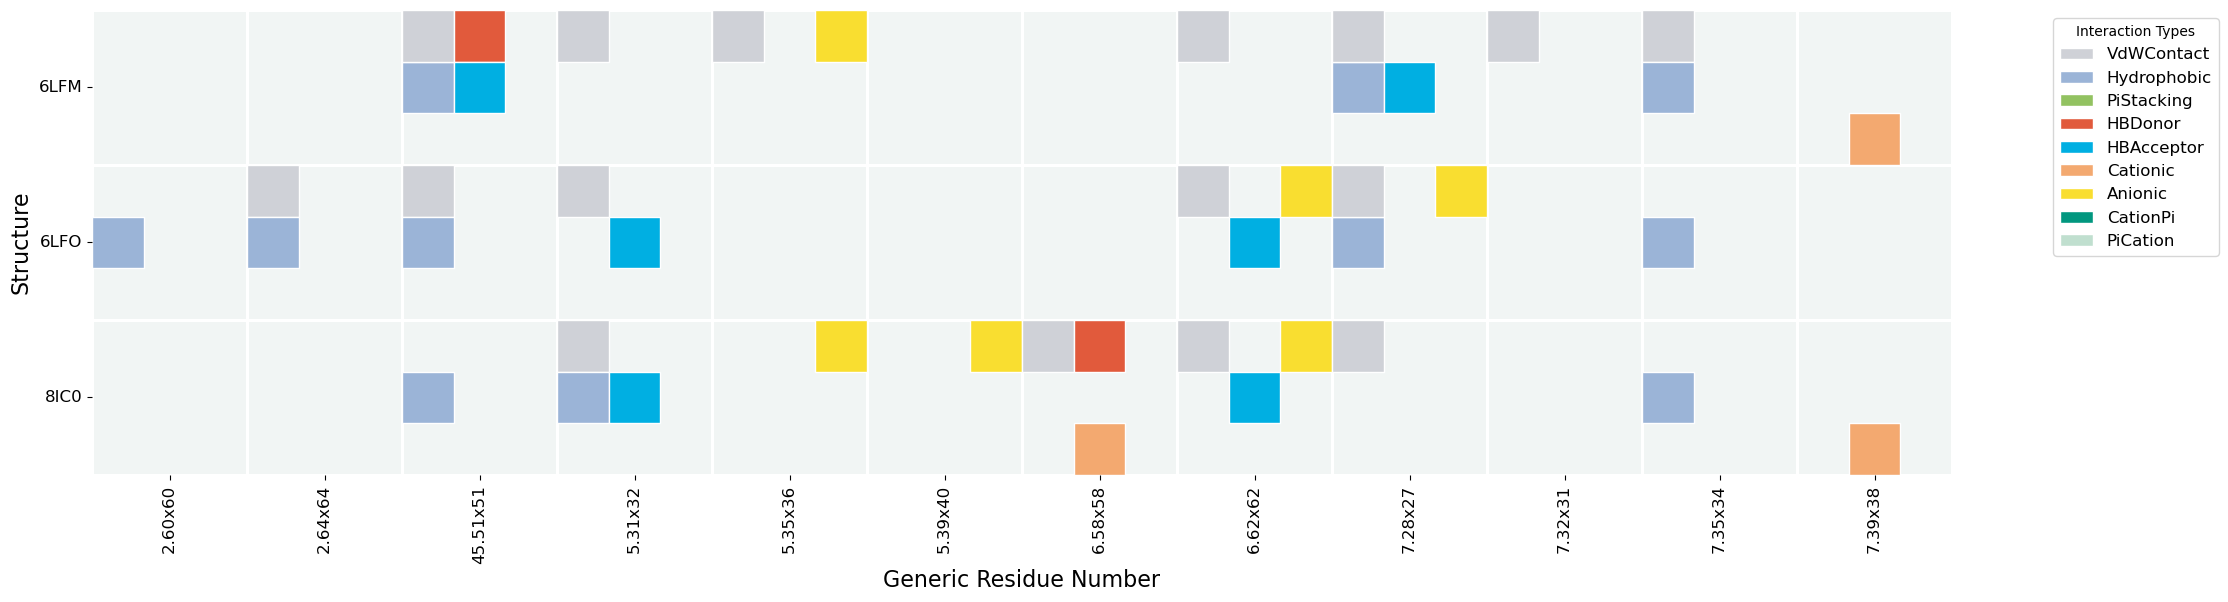

In [15]:
import os
import pickle
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch

def get_protein_residues(entry_name):
    """Fetch GPCR residues with generic numbers from GPCRdb."""
    url = f"https://gpcrdb.org/services/residues/{entry_name}/"
    response = requests.get(url, headers={"accept": "application/json"})
    
    if response.status_code == 200:
        return {
            residue["sequence_number"]: residue["display_generic_number"]
            for residue in response.json() if residue["display_generic_number"]
        }
    else:
        print(f"Error fetching data for {entry_name}: {response.status_code}")
        return {}

def load_pickle_data(pickle_directory, structure_chain_map):
    """Load and process interaction data from pickle files."""
    combined_data = []
    
    for filename in os.listdir(pickle_directory):
        if not filename.endswith(".pkl"):
            continue
        
        structure_name = filename.split('_')[0]
        chain_info = structure_chain_map.get(structure_name)
        
        if not chain_info:
            continue
        
        gene_name = chain_info["gene_name"]
        receptor_chain = chain_info["receptor_chain"]
        residues_dict = get_protein_residues(gene_name)
        
        try:
            fp = pd.read_pickle(os.path.join(pickle_directory, filename))
            interactions_dict = fp.ifp
            
            for inner_dict in interactions_dict.values():
                for (residue1, residue2), interactions in inner_dict.items():
                    if residue2.chain == receptor_chain:
                        generic_number = residues_dict.get(residue2.number, "N/A")
                        for interaction_type in interactions.keys():
                            combined_data.append({
                                "Structure": structure_name,
                                "Gene Name": gene_name,
                                "Residue A": f"{residue2.name} {residue2.number}",
                                "Residue B": f"{residue1.name} {residue1.number} {residue1.chain}",
                                "Interaction Type": interaction_type,
                                "Generic Residue Number": generic_number if generic_number != 'N/A' else str(residue2.number)
                            })
        except Exception as e:
            print(f"Error processing file {filename}: {e}")
    
    df = pd.DataFrame(combined_data)
    df = df[df['Generic Residue Number'].apply(lambda x: not x.isnumeric())]  # Filter out rows with missing generic numbers
    return df

def create_heatmap(data):
    """Generate a heatmap of interaction types across structures using a 9 sub-cell system."""
    if data.empty:
        print("No data available to create heatmap.")
        return
    
    pivot_df = data.pivot_table(
        index="Structure",
        columns="Generic Residue Number",
        values="Interaction Type",
        aggfunc=lambda x: ', '.join(set(x))
    ).fillna("")
    
    interaction_color_map = {
        'VdWContact': '#CFD1D7', 'Hydrophobic': '#9BB4D7', 'PiStacking': '#92C261',
        'HBDonor': '#E15A3C', 'HBAcceptor': '#00AFE2', 'Cationic': '#F3A970',
        'Anionic': '#F9DE30', 'CationPi': '#01977F', 'PiCation': '#C0DFCF'
    }
    
    subcell_positions = [(i, j) for i in range(3) for j in range(3)]
    interaction_order = list(interaction_color_map.keys())
    
    fig, ax = plt.subplots(figsize=(24, 20))
    sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),
                cmap=["#F1F5F4"], cbar=False, square=True, ax=ax,
                linewidths=2, linecolor="white")
    
    for y, row_label in enumerate(pivot_df.index):
        for x, col_label in enumerate(pivot_df.columns):
            interactions = pivot_df.iat[y, x].split(', ')
            unique_interactions = [i for i in interactions if i]
            
            for interaction in unique_interactions:
                if interaction in interaction_order:
                    idx = interaction_order.index(interaction)
                    subcell_x, subcell_y = subcell_positions[idx]
                    color = interaction_color_map.get(interaction, "grey")
                    rect = Rectangle((x + subcell_x * (1/3), y + subcell_y * (1/3)), 1/3, 1/3, color=color, ec="white", lw=1)
                    ax.add_patch(rect)
    
    ax.set_xticks([i + 0.5 for i in range(len(pivot_df.columns))])
    ax.set_xticklabels(pivot_df.columns, rotation=90, ha="center", fontsize=12)
    ax.set_yticks([i + 0.5 for i in range(len(pivot_df.index))])
    ax.set_yticklabels(pivot_df.index, rotation=0, va="center", fontsize=12)
    ax.set_xlabel("Generic Residue Number", fontsize=16)
    ax.set_ylabel("Structure", fontsize=16)
    
    legend_elements = [
        Patch(facecolor=interaction_color_map.get(interaction, "grey"), edgecolor='w', label=interaction)
        for interaction in interaction_color_map.keys()
    ]
    plt.legend(handles=legend_elements, title="Interaction Types", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.show()

# Example usage
pickle_directory = "./test_folder"
structure_chain_map = {
    "6LFM": {"chemokine_chain": "D", "receptor_chain": "R", "gene_name": "cxcr2_human"},
    "6LFO": {"chemokine_chain": "D", "receptor_chain": "R", "gene_name": "cxcr2_human"},
    "8IC0": {"chemokine_chain": "F", "receptor_chain": "A", "gene_name": "cxcr1_human"}
}

data = load_pickle_data(pickle_directory, structure_chain_map)
create_heatmap(data)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, Patch
import os

def load_and_prepare_data(files):
    combined_data = []
    
    # Loop through each file and assign PDB code and chain as structure identifier
    for file in files:
        # Extract the PDB code and chain from the filename by splitting by "_"
        filename = os.path.basename(file)
        pdb_code, chain_id = filename.split('_')[2], filename.split('_')[3].split('.')[0]
        structure_id = f"{pdb_code}_{chain_id}"
        
        # Load data
        data = pd.read_excel(file, sheet_name='Sheet1')
        
        # Assign the extracted PDB code and chain as structure identifier
        data['Structure'] = structure_id
        
        # Rename columns to standardize
        data = data.rename(columns={
            'Chemokine Residue': 'Residue',
            'Generic Number': 'Generic Number',
            'Interaction Type': 'Interaction Type'
        })
        
        # Append to combined list
        combined_data.append(data)
    
    # Concatenate all dataframes into a single DataFrame
    combined_data = pd.concat(combined_data, ignore_index=True)
    
    # Explode the Interaction Type column where multiple interactions are present
    combined_data = combined_data.assign(
        Interaction_Type=combined_data["Interaction Type"].str.split(", ")
    ).explode("Interaction Type")
    
    return combined_data


def create_heatmap(data):
    if data.empty:
        print("No data available to create heatmap.")
        return
    
    # Pivot table to create a structure-generic residue matrix
    pivot_df = data.pivot_table(
        index="Structure",
        columns="Generic Number",
        values="Interaction Type",
        aggfunc=lambda x: ', '.join(set(x))
    ).fillna("")
    
    # Define color mapping for interaction types
    interaction_color_map = {
        'VdWContact': '#CFD1D7',
        'Hydrophobic': '#9BB4D7',
        'PiStacking': '#92C261',
        'HBDonor': '#E15A3C',
        'HBAcceptor': '#00AFE2',
        'Cationic': '#F3A970',
        'Anionic': '#F9DE30',
        'CationPi': '#01977F',
        'PiCation': '#C0DFCF',
    }
    
    # Initialize the heatmap plot with the background color and white lines
    fig, ax = plt.subplots(figsize=(24, 20))
    sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),
                cmap=["#F1F5F4"], cbar=False, square=True, ax=ax, 
                linewidths=2, linecolor="white")
    
    # Define subcell positions within each cell (3x3 grid)
    subcell_positions = [(i, j) for i in range(3) for j in range(3)]
    
    # Define interaction order for subcells
    interaction_order = [
        'VdWContact', 'Hydrophobic', 'PiStacking', 
        'HBDonor', 'HBAcceptor', 'Cationic', 
        'Anionic', 'CationPi', 'PiCation'
    ]
    
    # Color each interaction type in the heatmap
    for y, row_label in enumerate(pivot_df.index):
        for x, col_label in enumerate(pivot_df.columns):
            interactions = pivot_df.iat[y, x].split(', ')
            unique_interactions = set([i for i in interactions if i])  # Get unique interactions

            for interaction in unique_interactions:
                if interaction in interaction_order:
                    idx = interaction_order.index(interaction)
                    subcell_x, subcell_y = subcell_positions[idx]
                    color = interaction_color_map.get(interaction, "grey")
                    width = 1 / 3
                    height = 1 / 3
                    rect = Rectangle((x + subcell_x * width, y + subcell_y * height), width, height, color=color, ec="white", lw=1)
                    ax.add_patch(rect)
    
    # Customize ticks and labels
    ax.set_xticks([i + 0.5 for i in range(len(pivot_df.columns))])
    ax.set_xticklabels(pivot_df.columns, rotation=0, ha="center", fontsize=14)  # Horizontal labels
    ax.xaxis.tick_top()  # Move x-axis labels to the top
    ax.xaxis.set_label_position("top")  # Move x-axis label to the top
    ax.set_xlabel("Generic Residue Number", fontsize=16, labelpad=20)  # Add x-axis label on top
    
    ax.set_yticks([i + 0.5 for i in range(len(pivot_df.index))])
    ax.set_yticklabels(pivot_df.index, rotation=0, va="center", fontsize=14)
    
    # Remove tick markers
    ax.tick_params(axis='x', length=0)  # Remove x-axis tick markers
    ax.tick_params(axis='y', length=0)  # Remove y-axis tick markers
    
    ax.set_ylabel("Structure", fontsize=16)
    
    # Create legend for interaction types
    legend_elements = [
        Patch(facecolor=interaction_color_map.get(interaction, "grey"), edgecolor='w', label=interaction)
        for interaction in interaction_color_map.keys()
    ]
    plt.legend(handles=legend_elements, title="Interaction Types", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.show()



# Example usage
files = [
    "Interaction_data_6LFM_D.xlsx",  # Replace with actual file path
    "Interaction_data_6LFO_D.xlsx",  # Replace with actual file path
    "Interaction_data_8IC0_F.xlsx"  # Add more files if needed
]

# Load and prepare data
combined_data = load_and_prepare_data(files)

# Generate heatmap
create_heatmap(combined_data)


FileNotFoundError: [Errno 2] No such file or directory: 'Interaction_data_6LFM_D.xlsx'

C:\Users\basde\AppData\Local\Temp\ipykernel_27560\555380075.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),


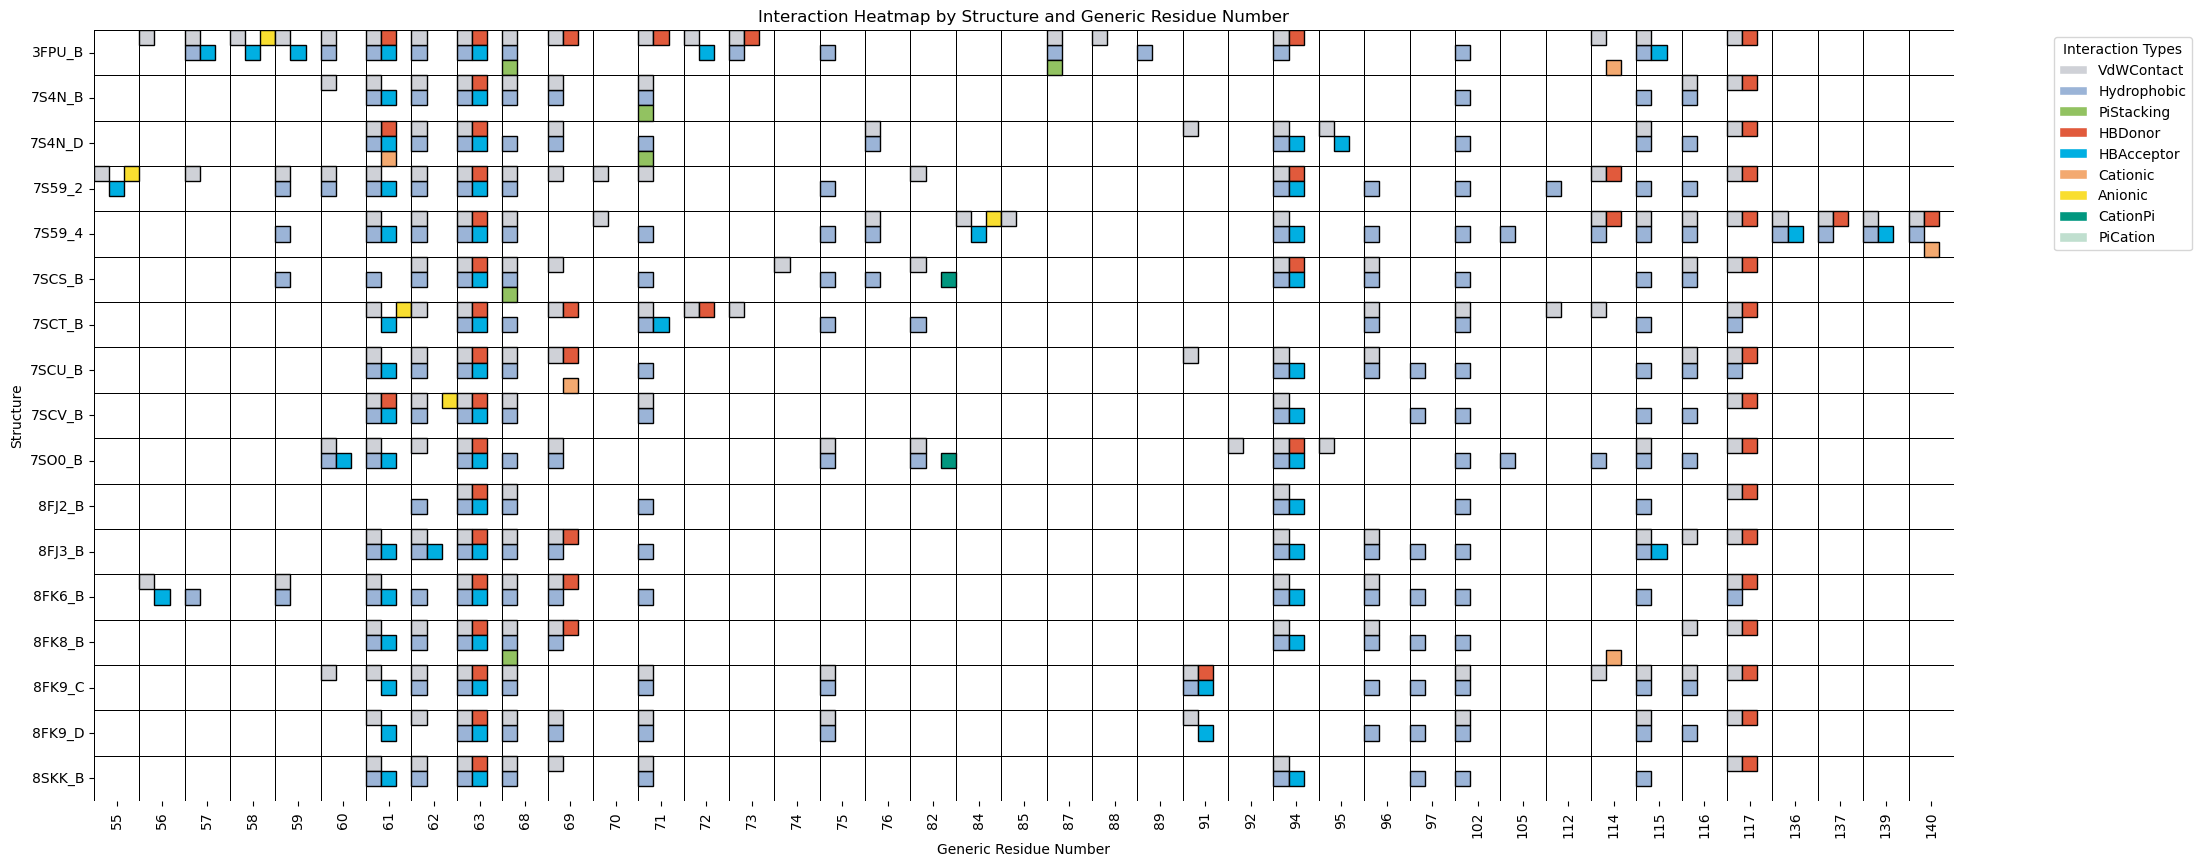

Occupancy of interactions at each generic number (ordered from large to small):
                Occupancy
Generic Number           
68                    115
63                    100
61                     79
94                     59
62                     48
96                     43
117                    42
71                     38
69                     32
115                    26
102                    21
116                    17
114                    16
59                     14
60                     12
75                     11
91                      9
97                      9
72                      7
82                      7
57                      7
73                      5
76                      5
112                     4
140                     4
84                      4
58                      4
137                     4
136                     3
139                     3
55                      3
95                      3
87                      3
56        

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, Patch
import os

def load_and_prepare_data(files):
    combined_data = []
    
    # Loop through each file and assign PDB code and chain as structure identifier
    for file in files:
        # Extract the PDB code and chain from the filename by splitting by "_"
        filename = os.path.basename(file)
        pdb_code, chain_id = filename.split('_')[2], filename.split('_')[3].split('.')[0]
        structure_id = f"{pdb_code}_{chain_id}"
        
        # Load data
        data = pd.read_excel(file, sheet_name='Sheet1')
        
        # Assign the extracted PDB code and chain as structure identifier
        data['Structure'] = structure_id
        
        # Rename columns to standardize
        data = data.rename(columns={
            'Chemokine Residue': 'Residue',
            'Generic Number': 'Generic Number',
            'Interaction Type': 'Interaction Type'
        })
        
        # Append to combined list
        combined_data.append(data)
    
    # Check if combined_data is not empty before concatenating
    if combined_data:
        # Concatenate all dataframes into a single DataFrame
        combined_data = pd.concat(combined_data, ignore_index=True)
        
        # Explode the Interaction Type column where multiple interactions are present
        combined_data = combined_data.assign(
            Interaction_Type=combined_data["Interaction Type"].str.split(", ")
        ).explode("Interaction Type")
    else:
        combined_data = pd.DataFrame()  # Return an empty DataFrame if no data is loaded
    
    return combined_data

def create_heatmap(data):
    if data.empty:
        print("No data available to create heatmap.")
        return
    
    # Pivot table to create a structure-generic residue matrix
    pivot_df = data.pivot_table(
        index="Structure",
        columns="Generic Number",
        values="Interaction Type",
        aggfunc=lambda x: ', '.join(set(x))
    ).fillna("")
    
    # Define color mapping for interaction types
    interaction_color_map = {
        'VdWContact': '#CFD1D7',
        'Hydrophobic': '#9BB4D7',
        'PiStacking': '#92C261',
        'HBDonor': '#E15A3C',
        'HBAcceptor': '#00AFE2',
        'Cationic': '#F3A970',
        'Anionic': '#F9DE30',
        'CationPi': '#01977F',
        'PiCation': '#C0DFCF',
    }
    
    # Initialize the heatmap plot
    fig, ax = plt.subplots(figsize=(24, 20))
    sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),
                cmap=["white"], cbar=False, square=True, ax=ax, linewidths=0.5, linecolor="black")
    
    # Define subcell positions within each cell (3x3 grid)
    subcell_positions = [(i, j) for i in range(3) for j in range(3)]
    
    # Define interaction order for subcells
    interaction_order = [
        'VdWContact', 'Hydrophobic', 'PiStacking', 
        'HBDonor', 'HBAcceptor', 'Cationic', 
        'Anionic', 'CationPi', 'PiCation'
    ]
    
    # Color each interaction type in the heatmap
    for y, row_label in enumerate(pivot_df.index):
        for x, col_label in enumerate(pivot_df.columns):
            interactions = pivot_df.iat[y, x].split(', ')
            unique_interactions = set([i for i in interactions if i])  # Get unique interactions

            for interaction in unique_interactions:
                if interaction in interaction_order:
                    idx = interaction_order.index(interaction)
                    subcell_x, subcell_y = subcell_positions[idx]
                    color = interaction_color_map.get(interaction, "grey")
                    width = 1 / 3
                    height = 1 / 3
                    rect = Rectangle((x + subcell_x * width, y + subcell_y * height), width, height, color=color, ec="black", lw=1)
                    ax.add_patch(rect)
    
    # Customize ticks and labels
    ax.set_xticks([i + 0.5 for i in range(len(pivot_df.columns))])
    ax.set_xticklabels(pivot_df.columns, rotation=90, ha="center")
    ax.set_yticks([i + 0.5 for i in range(len(pivot_df.index))])
    ax.set_yticklabels(pivot_df.index, rotation=0, va="center")
    ax.set_xlabel("Generic Residue Number")
    ax.set_ylabel("Structure")
    ax.set_title("Interaction Heatmap by Structure and Generic Residue Number")
    
    # Create legend for interaction types
    legend_elements = [
        Patch(facecolor=interaction_color_map.get(interaction, "grey"), edgecolor='w', label=interaction)
        for interaction in interaction_color_map.keys()
    ]
    plt.legend(handles=legend_elements, title="Interaction Types", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def get_xlsx_files_from_folder(folder_path):
    # List to store the paths of .xlsx files
    xlsx_files = []

    # Walk through the folder and get all .xlsx files
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".xlsx"):
                xlsx_files.append(os.path.join(root, file))
    
    return xlsx_files

def print_interaction_occupancy(data):
    if data.empty:
        print("No data available to print occupancy.")
        return
    
    # Ensure Interaction_Type is a string and not a list
    data['Interaction_Type'] = data['Interaction_Type'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    
    occupancy_df = data.groupby(['Generic Number', 'Interaction_Type']).size().unstack(fill_value=0)
    
    # Order the occupancy from large to small
    occupancy_df = occupancy_df.sum(axis=1).sort_values(ascending=False).to_frame(name='Occupancy')
    
    print("Occupancy of interactions at each generic number (ordered from large to small):")
    print(occupancy_df)

# Example usage
folder_path = "evasin"  # Replace with the path to your folder
files = get_xlsx_files_from_folder(folder_path)

# Load and prepare data
combined_data = load_and_prepare_data(files)

# Generate heatmap
create_heatmap(combined_data)

# Print occupancy of interactions at each generic number
print_interaction_occupancy(combined_data)


C:\Users\basde\AppData\Local\Temp\ipykernel_27560\3301820266.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),


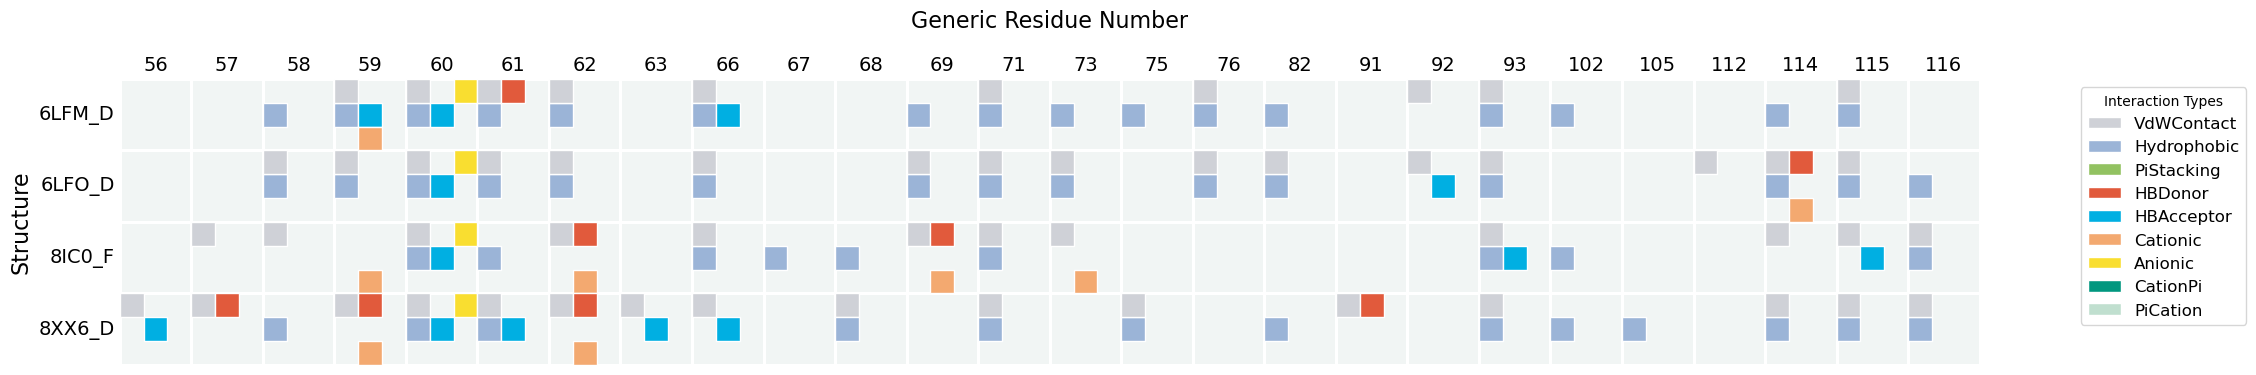

Occupancy of interactions at each generic number (ordered from large to small):
                Occupancy
Generic Number           
60                     31
59                     17
61                     15
62                     15
66                     13
93                     13
115                    11
114                    11
69                      8
71                      8
116                     7
73                      6
76                      5
82                      5
58                      5
92                      4
56                      4
68                      3
57                      3
75                      3
102                     3
91                      2
63                      2
67                      1
105                     1
112                     1


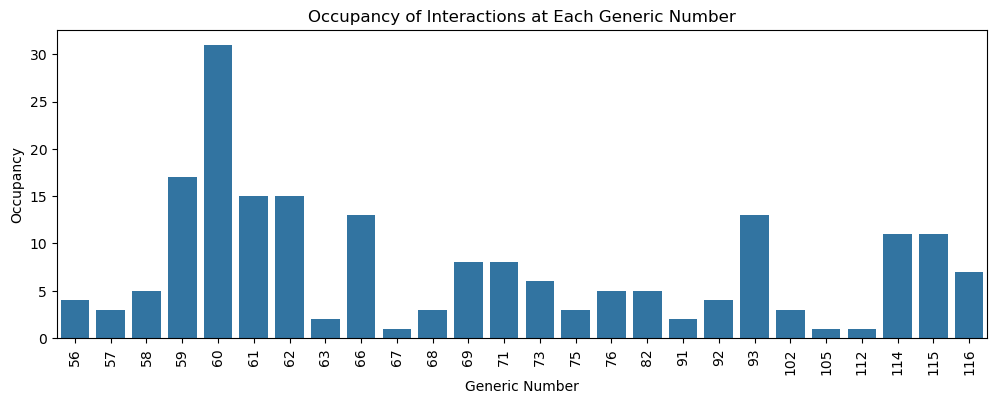

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_and_prepare_data(files):
    combined_data = []
    
    # Loop through each file and assign PDB code and chain as structure identifier
    for file in files:
        # Extract the PDB code and chain from the filename by splitting by "_"
        filename = os.path.basename(file)
        pdb_code, chain_id = filename.split('_')[2], filename.split('_')[3].split('.')[0]
        structure_id = f"{pdb_code}_{chain_id}"
        
        # Load data
        data = pd.read_excel(file, sheet_name='Sheet1')
        
        # Assign the extracted PDB code and chain as structure identifier
        data['Structure'] = structure_id
        
        # Rename columns to standardize
        data = data.rename(columns={
            'Chemokine Residue': 'Residue',
            'Generic Number': 'Generic Number',
            'Interaction Type': 'Interaction Type'
        })
        
        # Append to combined list
        combined_data.append(data)
    
    # Check if combined_data is not empty before concatenating
    if combined_data:
        # Concatenate all dataframes into a single DataFrame
        combined_data = pd.concat(combined_data, ignore_index=True)
        
        # Explode the Interaction Type column where multiple interactions are present
        combined_data = combined_data.assign(
            Interaction_Type=combined_data["Interaction Type"].str.split(", ")
        ).explode("Interaction Type")
    else:
        combined_data = pd.DataFrame()  # Return an empty DataFrame if no data is loaded
    
    return combined_data

def create_heatmap(data):
    if data.empty:
        print("No data available to create heatmap.")
        return
    
    # Pivot table to create a structure-generic residue matrix
    pivot_df = data.pivot_table(
        index="Structure",
        columns="Generic Number",
        values="Interaction Type",
        aggfunc=lambda x: ', '.join(set(x))
    ).fillna("")
    
    # Define color mapping for interaction types
    interaction_color_map = {
        'VdWContact': '#CFD1D7',
        'Hydrophobic': '#9BB4D7',
        'PiStacking': '#92C261',
        'HBDonor': '#E15A3C',
        'HBAcceptor': '#00AFE2',
        'Cationic': '#F3A970',
        'Anionic': '#F9DE30',
        'CationPi': '#01977F',
        'PiCation': '#C0DFCF',
    }
    
    # Initialize the heatmap plot with the background color and white lines
    fig, ax = plt.subplots(figsize=(24, 20))
    sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),
                cmap=["#F1F5F4"], cbar=False, square=True, ax=ax, 
                linewidths=2, linecolor="white")
    
    # Define subcell positions within each cell (3x3 grid)
    subcell_positions = [(i, j) for i in range(3) for j in range(3)]
    
    # Define interaction order for subcells
    interaction_order = [
        'VdWContact', 'Hydrophobic', 'PiStacking', 
        'HBDonor', 'HBAcceptor', 'Cationic', 
        'Anionic', 'CationPi', 'PiCation'
    ]
    
    # Color each interaction type in the heatmap
    for y, row_label in enumerate(pivot_df.index):
        for x, col_label in enumerate(pivot_df.columns):
            interactions = pivot_df.iat[y, x].split(', ')
            unique_interactions = set([i for i in interactions if i])  # Get unique interactions

            for interaction in unique_interactions:
                if interaction in interaction_order:
                    idx = interaction_order.index(interaction)
                    subcell_x, subcell_y = subcell_positions[idx]
                    color = interaction_color_map.get(interaction, "grey")
                    width = 1 / 3
                    height = 1 / 3
                    rect = Rectangle((x + subcell_x * width, y + subcell_y * height), width, height, color=color, ec="white", lw=1)
                    ax.add_patch(rect)
    
    # Customize ticks and labels
    ax.set_xticks([i + 0.5 for i in range(len(pivot_df.columns))])
    ax.set_xticklabels(pivot_df.columns, rotation=0, ha="center", fontsize=14)  # Horizontal labels
    ax.xaxis.tick_top()  # Move x-axis labels to the top
    ax.xaxis.set_label_position("top")  # Move x-axis label to the top
    ax.set_xlabel("Generic Residue Number", fontsize=16, labelpad=20)  # Add x-axis label on top
    
    ax.set_yticks([i + 0.5 for i in range(len(pivot_df.index))])
    ax.set_yticklabels(pivot_df.index, rotation=0, va="center", fontsize=14)
    
    # Remove tick markers
    ax.tick_params(axis='x', length=0)  # Remove x-axis tick markers
    ax.tick_params(axis='y', length=0)  # Remove y-axis tick markers
    
    ax.set_ylabel("Structure", fontsize=16)
    
    # Create legend for interaction types
    legend_elements = [
        Patch(facecolor=interaction_color_map.get(interaction, "grey"), edgecolor='w', label=interaction)
        for interaction in interaction_color_map.keys()
    ]
    plt.legend(handles=legend_elements, title="Interaction Types", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.show()





def get_xlsx_files_from_folder(folder_path):
    # List to store the paths of .xlsx files
    xlsx_files = []

    # Walk through the folder and get all .xlsx files
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".xlsx"):
                xlsx_files.append(os.path.join(root, file))
    
    return xlsx_files

def print_interaction_occupancy(data):
    if data.empty:
        print("No data available to print occupancy.")
        return
    
    # Ensure Interaction_Type is a string and not a list
    data['Interaction_Type'] = data['Interaction_Type'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    
    occupancy_df = data.groupby(['Generic Number', 'Interaction_Type']).size().unstack(fill_value=0)
    
    # Order the occupancy from large to small
    occupancy_df = occupancy_df.sum(axis=1).sort_values(ascending=False).to_frame(name='Occupancy')
    
    print("Occupancy of interactions at each generic number (ordered from large to small):")
    print(occupancy_df)

def plot_interaction_occupancy(data):
    if data.empty:
        print("No data available to plot occupancy.")
        return
    
    # Ensure Interaction_Type is a string and not a list
    data['Interaction_Type'] = data['Interaction_Type'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    
    occupancy_df = data.groupby(['Generic Number', 'Interaction_Type']).size().unstack(fill_value=0)
    
    # Order the occupancy from large to small
    occupancy_df_sum = occupancy_df.sum(axis=1).sort_values(ascending=False).to_frame(name='Occupancy')
    
    plt.figure(figsize=(12, 4))
    sns.barplot(x=occupancy_df_sum.index, y=occupancy_df_sum['Occupancy'])
    
    plt.xlabel('Generic Number')
    plt.ylabel('Occupancy')
    plt.title('Occupancy of Interactions at Each Generic Number')
    plt.xticks(rotation=90)
    plt.show()

# Example usage
folder_path = "CXCL8"  # Replace with the path to your folder
files = get_xlsx_files_from_folder(folder_path)

# Load and prepare data
combined_data = load_and_prepare_data(files)

# Generate heatmap
create_heatmap(combined_data)

# Print occupancy of interactions at each generic number
print_interaction_occupancy(combined_data)

# Plot occupancy of interactions at each generic number
plot_interaction_occupancy(combined_data)

C:\Users\basde\AppData\Local\Temp\ipykernel_19108\1737184709.py:84: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),


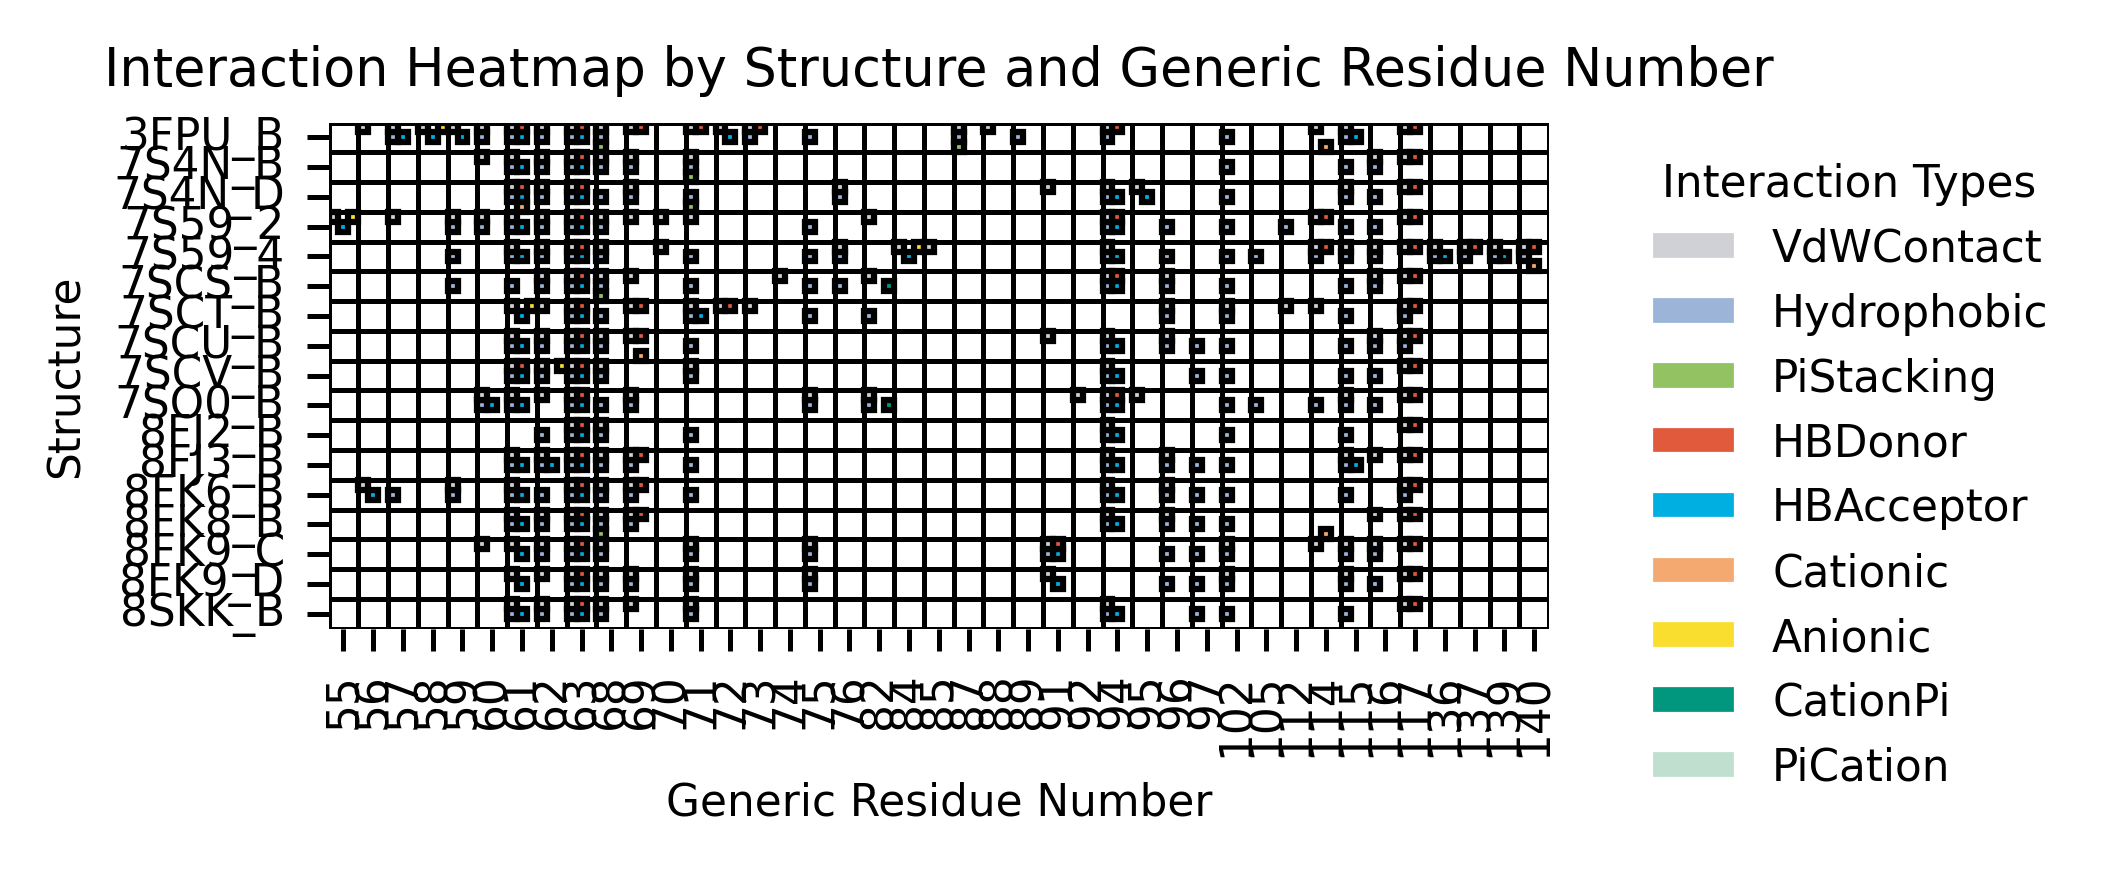

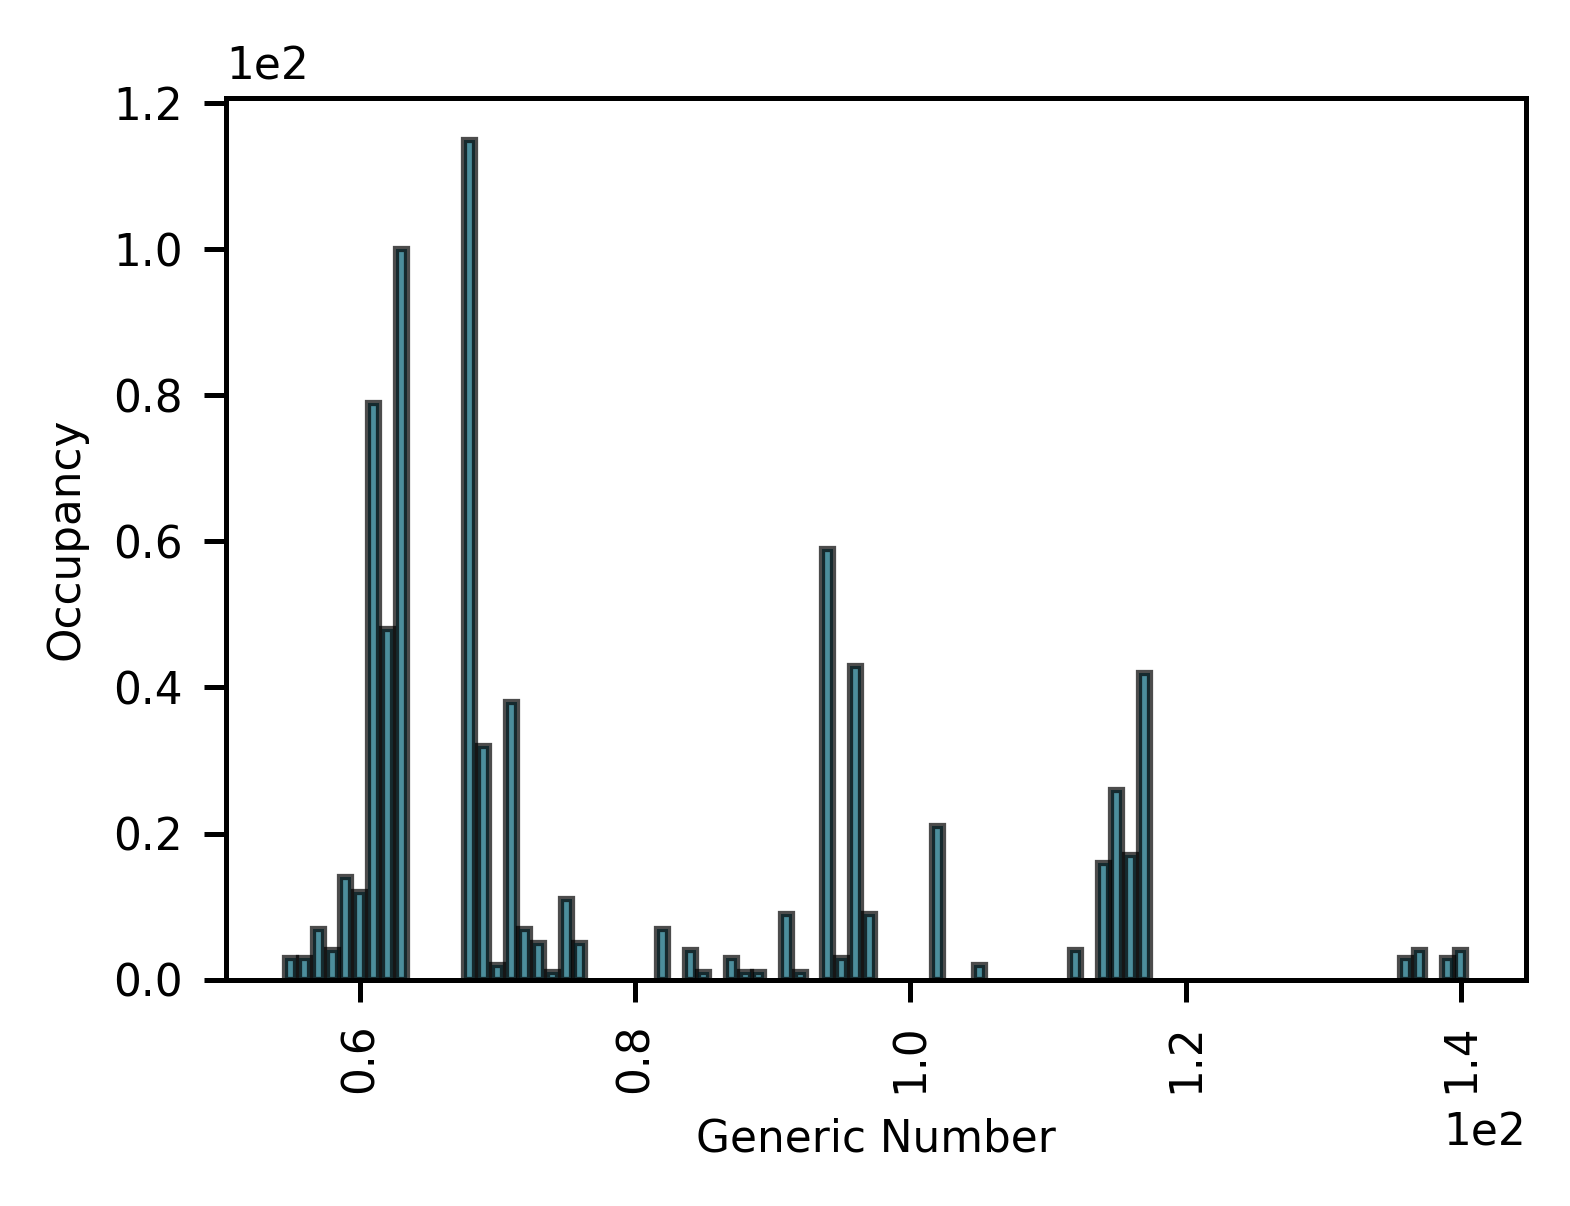

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from cycler import cycler

# Apply custom style
plt.rcParams.update({
    'figure.figsize': (3.5, 2.69),  # Golden ratio dimensions
    'axes.labelsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 7,
    'font.size': 7,
    'axes.grid': False,
    'ytick.left': True,
    'xtick.bottom': True,
    'lines.markersize': 3,
    'image.cmap': 'inferno',
    'axes.formatter.limits': (-1, 1),
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'savefig.transparent': True,
    'savefig.bbox': 'tight',
    'figure.dpi': 450,
    'legend.frameon': False,
    'axes.prop_cycle': cycler('color', [
        "#001219", "#005f73", "#0a9396", "#94d2bd", "#e9d8a6",
        "#ee9b00", "#ca6702", "#bb3e03", "#ae2012", "#9b2226"
    ]),
    'svg.fonttype': 'none',
})

def load_and_prepare_data(files):
    combined_data = []
    for file in files:
        filename = os.path.basename(file)
        pdb_code, chain_id = filename.split('_')[2], filename.split('_')[3].split('.')[0]
        structure_id = f"{pdb_code}_{chain_id}"
        data = pd.read_excel(file, sheet_name='Sheet1')
        data['Structure'] = structure_id
        data = data.rename(columns={
            'Chemokine Residue': 'Residue',
            'Generic Number': 'Generic Number',
            'Interaction Type': 'Interaction Type'
        })
        combined_data.append(data)
    if combined_data:
        combined_data = pd.concat(combined_data, ignore_index=True)
        combined_data = combined_data.assign(
            Interaction_Type=combined_data["Interaction Type"].str.split(", ")
        ).explode("Interaction Type")
    else:
        combined_data = pd.DataFrame()
    return combined_data

def create_heatmap(data):
    if data.empty:
        print("No data available to create heatmap.")
        return
    
    pivot_df = data.pivot_table(
        index="Structure",
        columns="Generic Number",
        values="Interaction Type",
        aggfunc=lambda x: ', '.join(set(x))
    ).fillna("")
    
    interaction_color_map = {
        'VdWContact': '#CFD1D7',
        'Hydrophobic': '#9BB4D7',
        'PiStacking': '#92C261',
        'HBDonor': '#E15A3C',
        'HBAcceptor': '#00AFE2',
        'Cationic': '#F3A970',
        'Anionic': '#F9DE30',
        'CationPi': '#01977F',
        'PiCation': '#C0DFCF',
    }

    fig, ax = plt.subplots()
    sns.heatmap(pivot_df.applymap(lambda x: 0 if x == "" else 1),
                cmap=["white"], cbar=False, square=True, ax=ax, linewidths=0.5, linecolor="black")
    
    subcell_positions = [(i, j) for i in range(3) for j in range(3)]
    interaction_order = [
        'VdWContact', 'Hydrophobic', 'PiStacking', 
        'HBDonor', 'HBAcceptor', 'Cationic', 
        'Anionic', 'CationPi', 'PiCation'
    ]
    
    for y, row_label in enumerate(pivot_df.index):
        for x, col_label in enumerate(pivot_df.columns):
            interactions = pivot_df.iat[y, x].split(', ')
            unique_interactions = set([i for i in interactions if i])
            for interaction in unique_interactions:
                if interaction in interaction_order:
                    idx = interaction_order.index(interaction)
                    subcell_x, subcell_y = subcell_positions[idx]
                    color = interaction_color_map.get(interaction, "grey")
                    width = 1 / 3
                    height = 1 / 3
                    rect = Rectangle((x + subcell_x * width, y + subcell_y * height), width, height, color=color, ec="black", lw=1)
                    ax.add_patch(rect)

    ax.set_xticks([i + 0.5 for i in range(len(pivot_df.columns))])
    ax.set_xticklabels(pivot_df.columns, rotation=90, ha="center")
    ax.set_yticks([i + 0.5 for i in range(len(pivot_df.index))])
    ax.set_yticklabels(pivot_df.index, rotation=0, va="center")
    ax.set_xlabel("Generic Residue Number")
    ax.set_ylabel("Structure")
    ax.set_title("Interaction Heatmap by Structure and Generic Residue Number")
    
    legend_elements = [
        Patch(facecolor=interaction_color_map.get(interaction, "grey"), edgecolor='w', label=interaction)
        for interaction in interaction_color_map.keys()
    ]
    plt.legend(handles=legend_elements, title="Interaction Types", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def plot_interaction_occupancy(data):
    if data.empty:
        print("No data available to plot occupancy.")
        return
    
    data['Interaction_Type'] = data['Interaction_Type'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    occupancy_df = data.groupby(['Generic Number', 'Interaction_Type']).size().unstack(fill_value=0)
    occupancy_df_sum = occupancy_df.sum(axis=1).sort_values(ascending=False).to_frame(name='Occupancy')
    
    fig, ax = plt.subplots()
    ax.bar(occupancy_df_sum.index, occupancy_df_sum['Occupancy'], color="#005f73", edgecolor='black', alpha=0.7)
    ax.set_ylabel('Occupancy', fontsize=7)
    ax.set_xlabel('Generic Number', fontsize=7)
    plt.xticks(fontsize=7, rotation=90)
    plt.yticks(fontsize=7)
    plt.tight_layout()
    plt.show()

folder_path = "evasin"
files = get_xlsx_files_from_folder(folder_path)
combined_data = load_and_prepare_data(files)
create_heatmap(combined_data)
plot_interaction_occupancy(combined_data)



